<hr style="height:2px;border:none"/>
<h1 align='center'> <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />

INF-395 / 477 / 577 Tarea 1 Redes Neuronales Artificiales - 2020-1 </h1>

<H3 align='center'> Integrantes: Sebastian Muñoz - Guillermo Meza </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en tensorflow, keras, pandas y numpy
* Redes Densas Feed Forward
* Regularización y Dropout
* Exploding & Vanishing Gradient
* Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Augmentation
* Interpretabilidad CNNs


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos). Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno para toda la tarea, con tal de que todos los entregables estén bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_ ( en caso de ser repositorio privado, invitar como colaborador al usuario de github "Aerlio") al correo electrónico del ayudante (*<tomas.ochoa.14@sansano.usm.cl>*), en copia al profesor (*<cvalle@inf.utfsm.cl>*). Especificar el siguiente asunto: [INF395/477/577-2020 Tarea1]
* Fecha de entrega y presentaciones: 13 de Noviembre. Hora límite de entrega: 23:00. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail. 

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

[1.](#primero) Conceptos básicos de redes neuronales  <br>
[2.](#segundo) Reconocimiento de lenguaje de señas <br>
[3.](#tercero) Interpretabilidad de CNNs, transfer learning, y skip connections <br>

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo solo son guías y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con comentarios y con celdas _Markdown_ con los comentarios de la pregunta y con cualquier analisis, fórmula o explicación que les parezca relevante para justificar sus procedimientos. 
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará mucho la elección en si, en cambio la argumentación detrás de la elección será lo más ponderado.

**Es ÁLTAMENTE recomendado realizar esta tarea en _Colab_ de Google (https://colab.research.google.com/notebooks/intro.ipynb#recent=true), con el fin de no depender del rendimiento de su computador personal al momento de entrenar redes neuronales y poder compartir de forma fácil sus avances con su compañer@ de trabajo.** Si bien conlleva sus pros y contras utilizar _Colab_ , existirá una curva de aprendizaje personal que lo ayudará a sacar el mayor provecho a esta herramienta, por ejemplo aprendiendo a guardar los avances realizados, evitando tener que ejecutar todo el código cada vez que se abra _Colab_ . *Tip: Una vez abierto un notebook en _Colab_ ir a **entorno de ejecución**->**Cambiar tipo de entorno de ejecución**, y seleccionár TPU como acelerador por hardware para redes feedforward y GPU para redes convolucionales.*.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
images_dir = '/content/drive/My Drive/Colab Notebooks/images'

Mounted at /content/drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Conceptos básicos de redes neuronales

De las redes neuronales artificiales más simples se encuentran las redes densas o _Feed Forward_, donde todas las neuronas de una capa están conectadas a todas las salidas de la capa anterior y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más fácil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta área del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades, learning rate, etc...; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del _vanishing gradient y el _exploding gradient_, viendo también algunos optimizadores existentes.


<h1 align='center'> <img src="https://images.fineartamerica.com/images/artworkimages/mediumlarge/1/water-flea-daphnia-magna-ted-kinsman.jpg" width="40%" height="30%" /> </h1>

Para realizar esto usaremos un problema de regresión sencillo y utilizaremos los paquetes tensorflow y keras para explorar los conceptos básicos del mundo de las redes neuronales artificiales. Dado que puede tomar tiempo entrenar redes neuronales, y existe una amplia gama de conceptos a cubrir, utilizaremos un dataset de tamaño limitado con menos de 1000 observaciones, recordar que las redes neuronales tienen una naturaleza _data hungry_ por lo que su desempeño se puede ver limitado por la poca cantidad de observaciones en algunos casos. El dataset en cuestión consiste de 8 atributos (descriptores moleculares) de 546 productos químicos usados para predecir la toxicidad acuática aguda hacia la especie Daphnia Magna, para su descarga y descripción más detallada: https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity.

## 1.a Carga de datos y preprocesamiento.

##### I) Partiremos cargando los datos. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files   #-> For Google Colab, there are other methods
import io
header_list = ["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050","LC50-response"]
df2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/qsar_aquatic_toxicity.csv',names=header_list,sep=";")

##### II) **Comente y visualice** las distribuciones de cada atributo del dataset utilizando herramientas estadísticas básicas, boxplots e histogramas.

In [ ]:
df2.head()

,TPSA,SAacc,H-050,MLOPG,RDCHI,GATS1p,nN,C-050,LC50-response
0,0.00,0.0,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.0,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.0,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.0,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.0,0,4.068,2.758,0.695,0,0,5.979


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

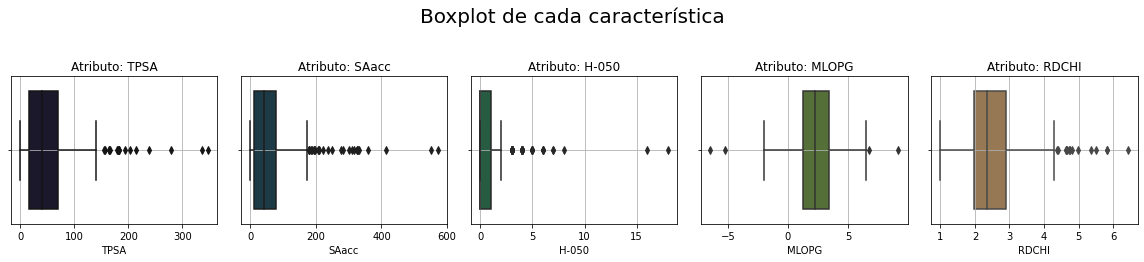

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

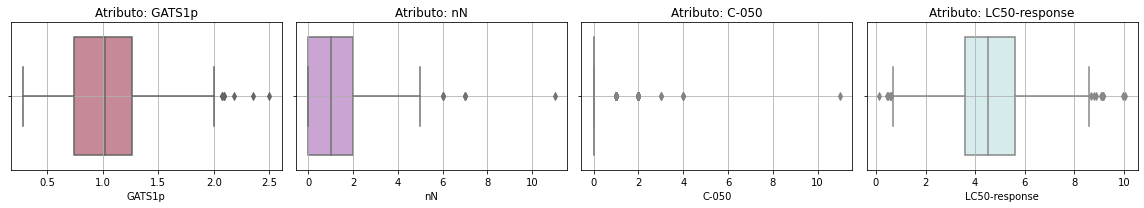

In [4]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,3] # <- Controla el tamaño del plot dentro del Notebook
import seaborn as sns  # <- Herramienta complementaria para distintos tipos de plots
cols=sns.color_palette("cubehelix", 9) # <-Paleta de colores a utilizar 9 es el número de colores que componen la paleta
plt.suptitle('Boxplot de cada característica',size=20,y=1.2)
k,K=1,1
for i in df2.columns[:]:
  if K<=5: plt.subplot(1,5,k)
  else: plt.subplot(1,4,k)
  plt.title('Atributo: '+str(i))
  sns.boxplot(df2[i],color=cols[K-1])
  plt.tight_layout()
  plt.grid()
  if k==5:
      k=1
      K+=1
      plt.show()
  else:
      k+=1
      K+=1

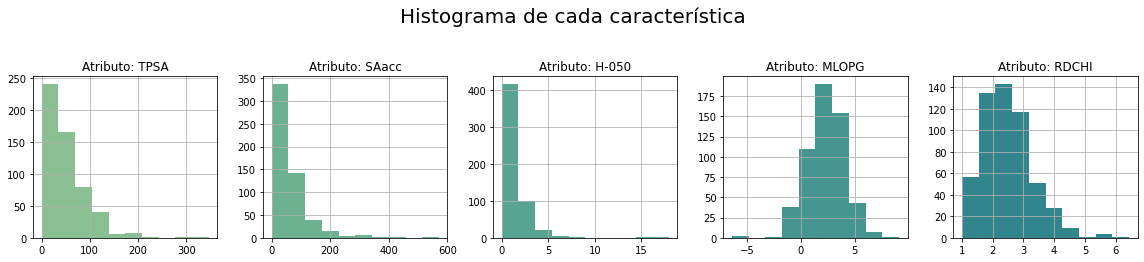

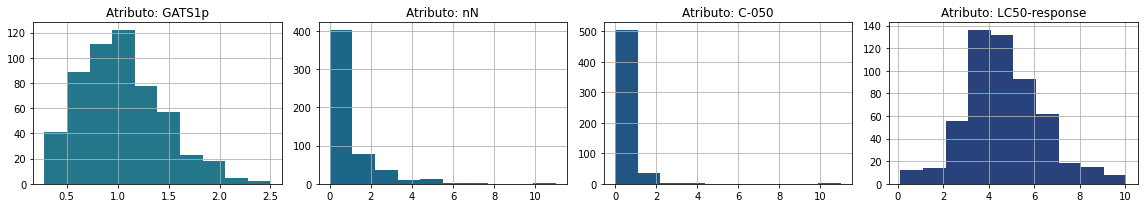

In [ ]:
plt.rcParams['figure.figsize']=[16,3] # <- Controla el tamaño del plot dentro del Notebook
cols=sns.color_palette("crest", 9) # <-Paleta de colores a utilizar 9 es el número de colores que componen la paleta
plt.suptitle('Histograma de cada característica',size=20,y=1.2)
k,K=1,1
for i in df2.columns[:]:
  if K<=5: plt.subplot(1,5,k)
  else: plt.subplot(1,4,k)
  plt.title('Atributo: '+str(i))
  plt.hist(df2[i],color=cols[K-1])
  plt.tight_layout()
  plt.grid()
  if k==5:
      k=1
      K+=1
      plt.show()
  else:
      k+=1
      K+=1

### Respuesta

SE puede observar que distintos atributos tienen ordenes de magnitud, medias y desviaciones distintas.

Los atributos SAacc, H-050, nN y C-050 tienen la mayor parte de sus registros en 0, y existen outlayers que debemos tener en cuenta para saber si estos influyen en el comportamiento del modelo de predicción.

Ademas vemos posible el modelado de los atributos SAacc, H-050, nN y C-050 como una distribución de Poisson, mientras que MLOPG, RDCHI, GATS1p y LC50-resonse se pueden comportar como una Normal, TPSA se puede aproximar a una Exponencial. 

##### III) **Separe** el dataset en conjuntos de entrenamiento, validación y test, para luego estandarizar, considere un 70% de los datos para entrenamiento, un 20% para validación y un 10% para test. Para esto puede utilizar la librería sklearn, en particular las funciones StandarScaler y train_test_split. **Verifique** que el tamaño de los conjuntos se asemeje al indicado. 

**Pregunta:** ¿Cuál es la función de cada uno de estos conjuntos?

Para aclarar conceptos acerca de estos conjuntos: https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x=df2.drop(columns=['LC50-response'])
y=np.asarray(df2['LC50-response']).reshape(-1,1)
x_tr, x_test, y_tr, y_test  = train_test_split(x, y, test_size=0.1, shuffle=True)
x_tr, x_val, y_tr, y_val = train_test_split(x_tr, y_tr, test_size=0.2/0.9, shuffle=True)
print(len(x_tr) , len(x_val), len(x_test))

381 110 55


In [6]:
scaler_x = StandardScaler()
scaler_x.fit(x_tr)
x_tr = scaler_x.transform(x_tr)
x_val = scaler_x.transform(x_val)
x_test = scaler_x.transform(x_test)
scaler_y = StandardScaler()
scaler_y.fit(y_tr.reshape(-1,1))
y_tr = scaler_y.transform(y_tr)
y_val = scaler_y.transform(y_val)
y_test = scaler_y.transform(y_test)

### Respuesta
El training set es usado en el proceso de feed forward y backpropagation para ajustar el modelo mediante la correccion de los pesos.

El validation set sirve para calcular los errores en el proceso de entrenamiento, pero no influye en el ajuste del modelo, esta informacion sirve para ajustar los hiperparametros, por ejemplo el Learning Rate, activadores, funcion de error, cantidad de capas y neuronas, etc. dependiendo del modelo que se esta entrenando. Tambien es conveniente visualizar elerror de entrenamiento vs validación para detectar sobreajuste.

El testing set evalua  la capacidad de generalizacion de un modelo ya entrenado, es decir, evaluar la calidad de las predicciones de inputs nuevos.

##### IV) **Visualice** de la forma que estime conveniente para realizar comparaciones, las distribuciones para todas las variables (atributos y target) antes de estandarizar, y después de estandarizar para los conjuntos de entrenamiento, validación y test. **Comente**. 

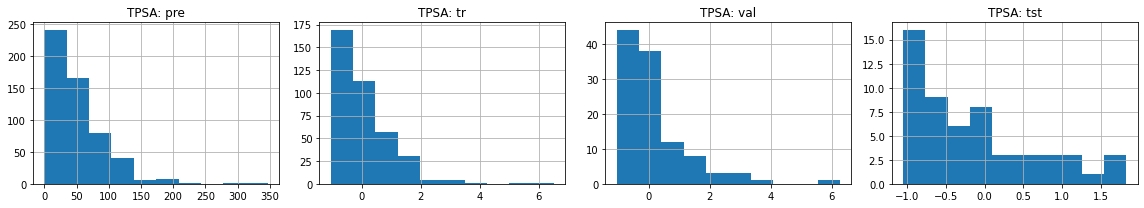

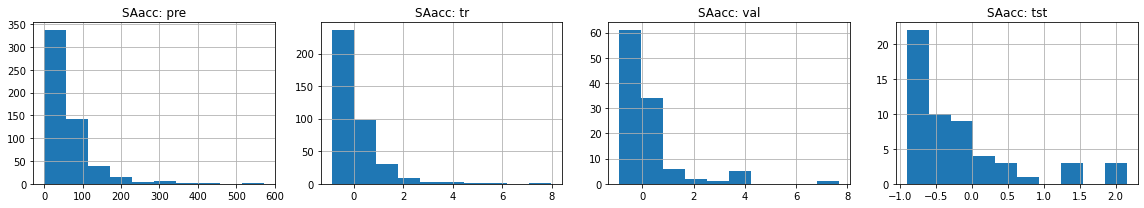

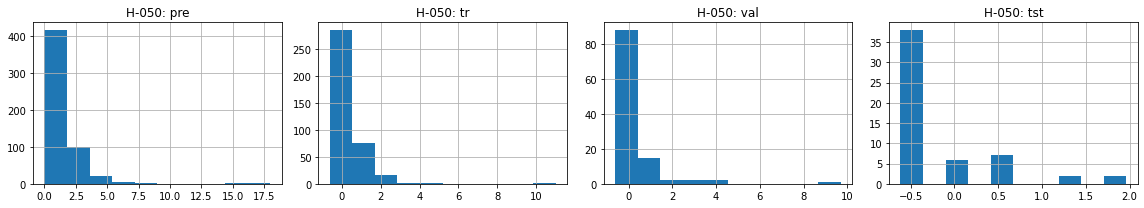

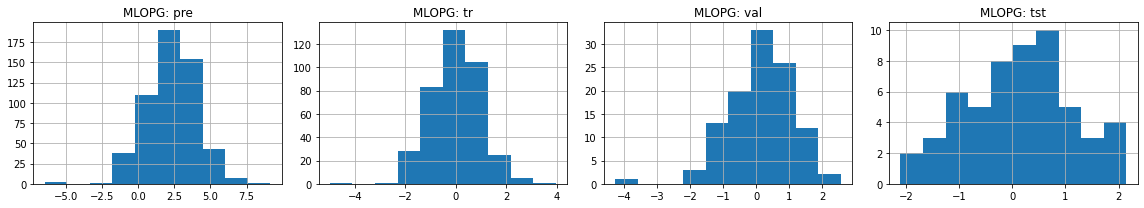

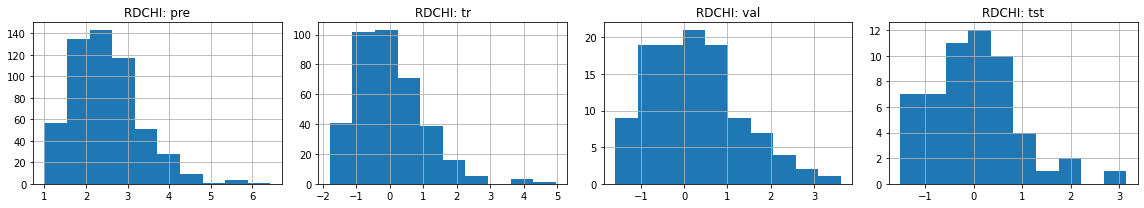

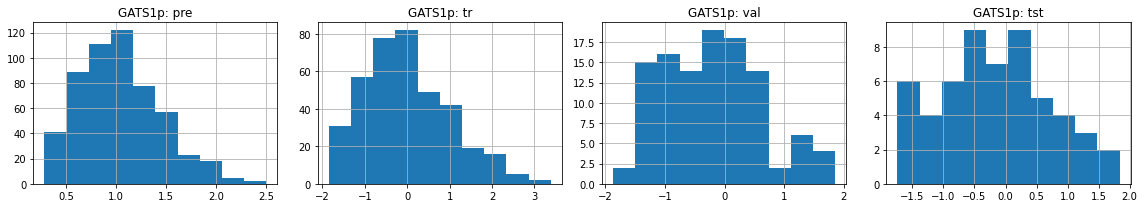

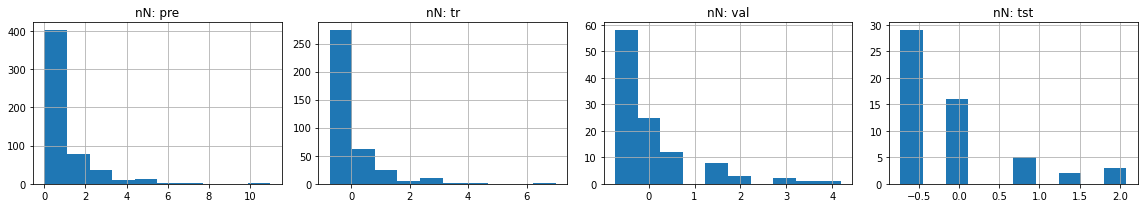

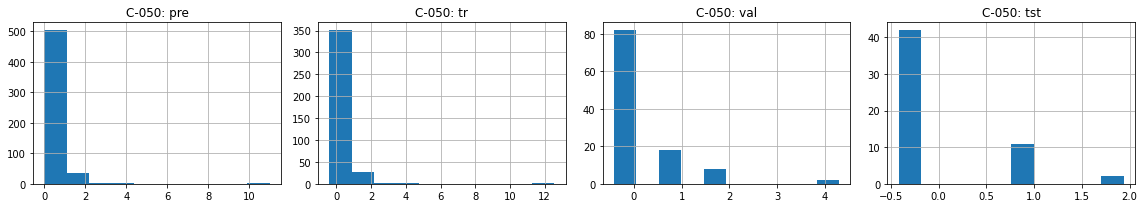

In [ ]:
vpl=["TPSA","SAacc","H-050","MLOPG","RDCHI","GATS1p","nN","C-050"]
for j in range(8): # <- completar
  vars=[np.asarray(x)[:,j],x_tr[:,j],x_val[:,j],x_test[:,j]]
  pl=["pre","tr","val","tst"]
  for k in range(4):
    plt.subplot(1,4,k+1)
    plt.title(vpl[j]+": "+pl[k]) # <- completar
    # sns.boxplot(vars[k],color=cols[k]) # <- completar puede usar boxplot, histogramas u otra herramienta
    plt.hist(vars[k])
    plt.tight_layout()
    plt.grid()
  plt.show()

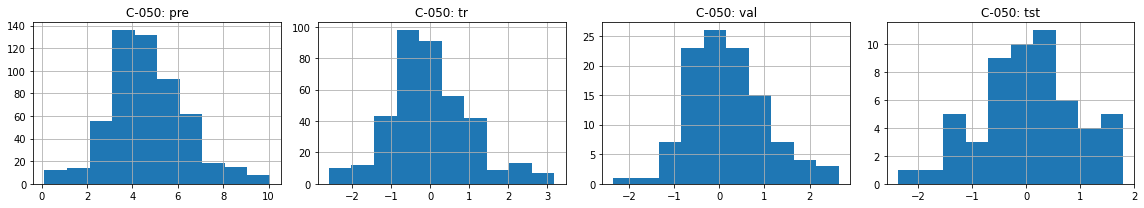

In [ ]:
vars=[np.asarray(y),y_tr,y_val,y_test]
pl=["pre","tr","val","tst"]
for k in range(4):
    plt.subplot(1,4,k+1)
    plt.title(vpl[j]+": "+pl[k]) # <- completar
    # sns.boxplot(vars[k],color=cols[k]) # <- completar puede usar boxplot, histogramas u otra herramienta
    plt.hist(vars[k])
    plt.tight_layout()
    plt.grid()

### Respuesta
Los datos se estandarizan y quedan centrados en 0, esto se traduce en que los features y target se encuentran en un mismo orden de magnitud.
  
  Se puede apreciar que el tamño de los sets de training, validation y test son lo suficientemente grandes para que mantengan una curva de distribución similar entre ellos, sin embargo estas curvas no dejan de tener diferencias.

  Para los atributos con gran cantidad de 0´s, al normalizarse la media no los afecta mucho, manteniendo el sesgo y los outlayers de la distribución inicial. 
  


##### V) **Pregunta:** ¿Por qué seleccionar los conjuntos de entrenamiento, validación y test _by hand_ es una mala práctica? ¿Qué beneficios _tramposos_ se pueden obtener de esta mala práctica?.

### Respuesta
El beneficio tramposo ocurre cuando se eligen datos convenientes para reducir el error de training , lo cual puede generar sobreajuste.

Por otro lado, es una mala práctica porque elegir a mano es un metodo sesgado de eleccion que puede introducir patrones de comportamiento a los features inexistentes en los datos reales.

##### VI) **Bonus:** Tome decisiones, p.ej realice transformaciones, manipulaciones, etc... de manera fundamentada que ayuden a mejorar la conformación de los conjuntos para el posterior entrenamiento de la red neuronal. Evite malas prácticas.

## 1.b Primera arquitectura

Partiremos cargando los paquetes necesarios. Conozcamos tensorflow y keras:

_TensorFlow_ es una librería de computación matemática, que ejecuta de forma rápida y eficiente gráficos de flujo. Un gráfico de flujo está formado por operaciones matemáticas representadas sobre nudos, y cuya entrada y salida es un vector multidimensional (o tensor) de datos. 

_Keras_ es una abstracción, un API High-level, para la creación de modelos de aprendizaje. Aporta una sintaxis homogénea y un interface sencillo, modular y ampliable para la creación de redes neurales.

Las redes neurales son un tipo particular de gráfico de flujo de datos. Por tanto, TensorFlow y Keras combinan perfectamente.

In [9]:
import tensorflow as tf
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras import activations
from tensorflow.python.keras.engine import input_layer

##### I) Entrene la siguiente red neuronal de una capa con funciónes de activación sigmoidales, función de pérdida MSE, optimizador SGD, y learning rate=0.01 por 500 epochs. Este entrenamiento toma menos de 20 segundos en _Colab_ con entorno de ejecución TPU

In [10]:
from keras.optimizers import SGD
from keras.callbacks import History 

# Define architecture
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='sigmoid',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='sigmoid',use_bias=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Define callbacks (No modificar patience!!!!!!!!! es solo para que la conozcan por el momento)
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] 

# Train model
hist_1_b_i = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
#verbose=1 shows epoch per epoch evolution, not necessary if you are planning to plot hist

#Evaluacion del conjunto de test
y_pred=model(x_test) # model.predict(x_test) returns numpy array
test_batch_loss=tf.keras.losses.MSE(y_test, y_pred)

Note cómo se puede evaluar todo el conjunto de test en sólo un paso:

Note cómo se obtiene el error MSE para cada observación en el conjunto de test. Se introdujo a propósito la notación batch para definir la variable python, esta dimensión debe ser siempre la primera dimensión del tensor cuando entrenamos redes neuronales. Un batch es un conjunto de observaciones, dado que estamos tratando con la evaluación del conjunto de test se utilizó un batch de tamaño máximo (igual a la cantidad de observaciones del conjunto de test).

In [ ]:
test_batch_loss

<tf.Tensor: shape=(55,), dtype=float32, numpy=
array([1.6012816e+00, 2.0117612e+00, 2.4779254e-01, 1.3361417e+00,
       3.2331100e+00, 5.2722480e-02, 3.5590374e-01, 2.3234832e+00,
       3.4909835e-01, 3.8730273e-01, 9.3459800e-02, 7.6402688e-01,
       1.3989178e-02, 1.4784928e-01, 2.1706574e-01, 2.5221294e-01,
       4.0787041e-02, 3.8087296e-01, 7.3711765e-01, 6.2835574e-02,
       7.6416874e-01, 2.2378522e-03, 3.8331461e-01, 3.2908240e-01,
       6.5663952e-01, 4.2153722e-01, 6.5150337e+00, 5.1850611e-01,
       1.0590354e+00, 2.3301222e+00, 4.5275146e-01, 6.8899357e-01,
       4.3526188e-01, 2.0097556e-02, 1.1302900e+00, 1.1245754e+00,
       1.3938500e-02, 1.2134179e+00, 1.7128164e+00, 4.1935329e+00,
       1.4959431e-01, 1.6823808e+00, 9.8410392e-01, 4.4120443e-03,
       5.3226840e-01, 6.3314432e-01, 6.9608241e-01, 1.7816001e-01,
       1.3069203e-01, 1.7318849e-01, 2.4124951e+00, 6.2300455e-02,
       5.1319456e-01, 2.4936290e-01, 7.1801609e-01], dtype=float32)>

Obtenga el error MSE promedio para todo el conjunto de test. **Aprecie** cómo se graficará el proceso de entrenamiento de la red neuronal, tendrá que repetir este proceso para reportar resultados múltiples veces durante el ramo. Utilizar verbose=1 para reportar resultados **NO ES VÁLIDO**, dado que es de difícil lectura y ocupa una cantidad de espacio innecesaria, se recomienda utilizar esta opción para estimar cuánto tiempo se demorará en entrenar la red viendo un par de epochs, luego se puede pausar el entrenamiento y desactivar el verbose para volver a entrenar. Esto no es obligatiorio y condicional de cuánto epochs se están entrenando, sin embargo considere que un entrenamiento por 1000 epochs puede ocupar el equivalente a 10 páginas pdfs, lo que dificultará la navegación por el archivo, pues no siempre es posible plegar el output de una celda (depende de cómo se está visualizando el archivo, p.ej al ver un notebook por github no se podrán plegar los outputs). **Comente** el gráfico generado, **Preguntas:** ¿existe overfitting? **¿Qué conclusiones puede sacar al observar el error del conjunto de test y compararlo respecto al conjunto de entrenamiento y validación?**

### Respuesta
No hay overfiting, y la capacidad de generalizacion de la red es bastante buena considerando la media de los errores y los rangos de las salidas esperadas. Respecto a los errores, se podría esperar que estos puedan mejorar con más epochs, dado que las curvas de error no convergen del todo con 500 epochs, y no pareciera que el error de validación fuese a subir por ahora.

Creemos que los errores podría bajar con una funcion de activacion lineal o relu en la capa de salida, ya que en el modelo actual, la capa de salida cuenta con activación sigmoidal [0.1], y el target feature cuenta con valores centrados en 0 de -2 a 2 app.


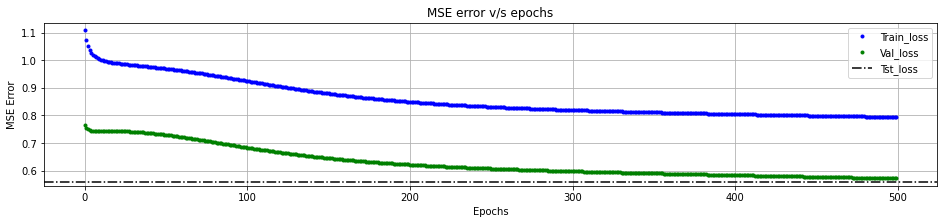

In [ ]:
test_loss_1_b_i=tf.math.reduce_mean(test_batch_loss).numpy() # .numpy() converts tensor to array, tf.convert_to_tensor converts array to tensor
plt.title("MSE error v/s epochs")
plt.plot(hist_1_b_i.history["loss"],"b.",label="Train_loss")
plt.plot(hist_1_b_i.history["val_loss"],"g.",label="Val_loss")
plt.axhline(y=test_loss_1_b_i,color="k",linestyle="-.",label="Tst_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

##### II) **Entrene** una red neuronal con los mismos hiperparámetros que en la sección anterior pero con función de activación ReLU.

In [ ]:
input_dense= input_layer.Input(shape=(x_tr.shape[1]))
dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Define callbacks (No modificar patience!!!!!!!!! es solo para que la conozcan por el momento)
my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] 

hist_1_b_ii = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks) 
test_loss_1_b_ii=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()

##### III) **Cree** una función que grafique los resultados, puede basarse en el siguiente código. La función creada la puede ir modificando en los siguientes items para reducir esfuerzos (fijarse en que la visualización sea lo más clara posible). **Visualice y compare** los resultados con los obtenidos en el punto 1.b.I). **Comente**.

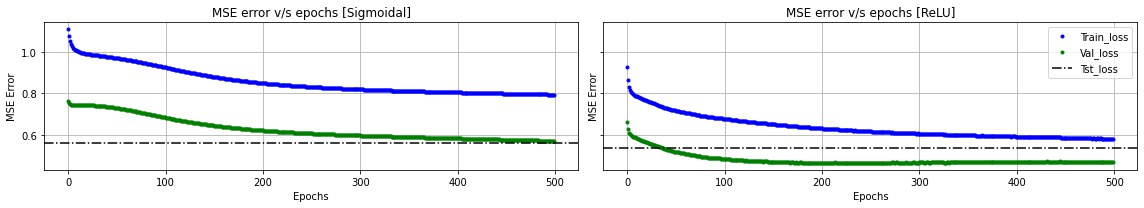

In [ ]:
plt.rcParams["figure.figsize"]=[16,3]
hists=[hist_1_b_i.history,hist_1_b_ii.history]
tsts=[test_loss_1_b_i,test_loss_1_b_ii]
titles=["MSE error v/s epochs [Sigmoidal]","MSE error v/s epochs [ReLU]"]
def graph_results(hists,tsts,titles):
  fig, axes = plt.subplots(1, len(hists), sharey=True) # sharey to keep the same y lims for all subplots. 
                                            # En algunos casos esto puede jugar en contra para una buena visualización -> ver siguiente comentario
  for i,ax in enumerate(axes):
    ax.set_title(titles[i])
    ax.plot(hists[i]["loss"],"b.",label="Train_loss")
    ax.plot(hists[i]["val_loss"],"g.",label="Val_loss")
    ax.axhline(y=tsts[i],color="k",linestyle="-.",label="Tst_loss")
    ax.set_xlabel("Epochs"),ax.set_ylabel("MSE Error")
    # ax.set_ylim([ym,YM])  # <- Puede convenir insertar como entrada a la función límite inferiores y superiores para ajuste manual
    if i==len(axes)-1: ax.legend()
    ax.grid()
  plt.tight_layout()
  plt.show()

graph_results(hists,tsts,titles) # llamado simple para graficar

### Respuesta
Usando ReLu, el error de validación de training bajan considerablemente y se puede notar ahora sobreajuste, ya que el error de validación se mantiene constante y el de training sigue bajando.

El error de testing disminuye, creemos por la razon explicada en la pregunta anterior (el rango de salida del modelo corresponde con los valores de y_test).


## 1.c Sensibilidad a hiperparámetros

##### I) **Utilice** la siguiente función (o implemente una propia) para **recopilar** el error de entrenamiento, validación y test **según** el número de capas en la red neuronal y el número de neuronas. Considere el mismo número de neuronas para cada capa. Seleccione dos valores para la cantidad de neuronas entre 10 y 100, y varíe la profundidad entre 1 y 3, e.d 6 redes en total. Utilice la f° de activación ReLU, 500 epochs, lr=0.01, y error MSE. **Encuentre los hiperparámetros (n° neuronas y profundidad) que obtienen el menor error de validación**. 

**Pregunta:** ¿Por qué el menor error de validación y no de test?

**Visualice** y **Comente** los resultados.

In [ ]:
def train_network_1_c_i(prof_dense,n_neurons):
  input_dense=input_layer.Input(shape=(x_tr.shape[1]))
  for i in range(prof_dense):
    if i==0:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(input_dense)
    else:
      dense=layers.Dense(n_neurons, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  # Compile model
  model.compile(optimizer=SGD(learning_rate=0.001),loss='mean_squared_error')
  # define callbacks (keep patience at 100)
  my_callbacks = [History(), # Returns validation and training loss
    tf.keras.callbacks.EarlyStopping(patience=100,monitor="val_loss", #Stops training when the validation loss doesnt get better in n°patience consecutive epochs
                                     restore_best_weights=True)] # Returns best validation loss
  # Train model
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return(hist,test_loss)

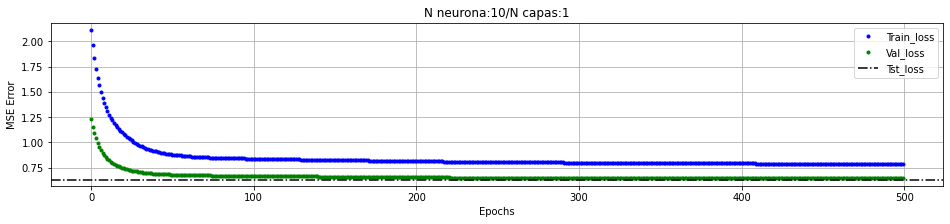

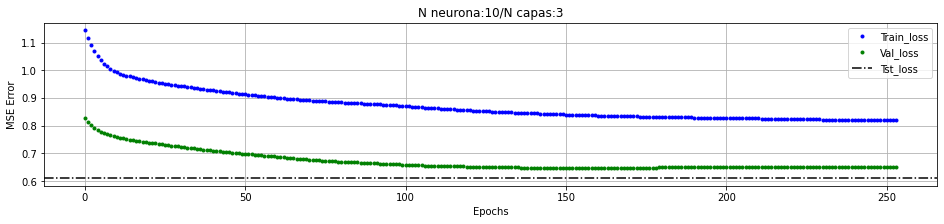

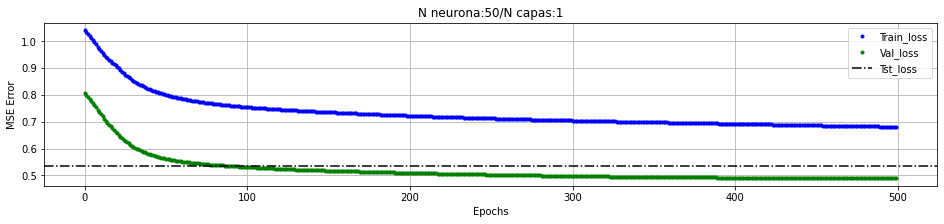

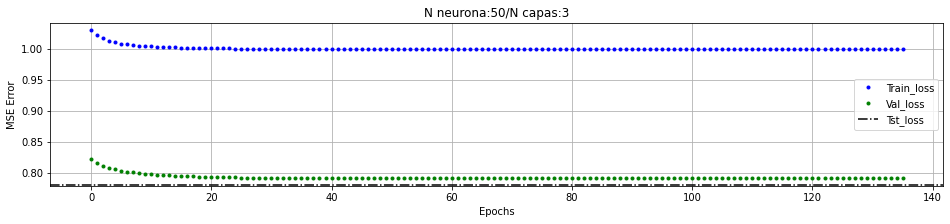

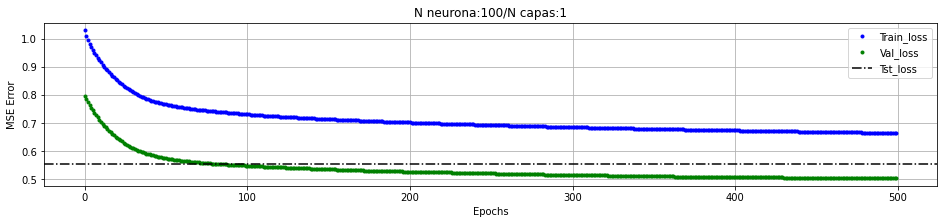

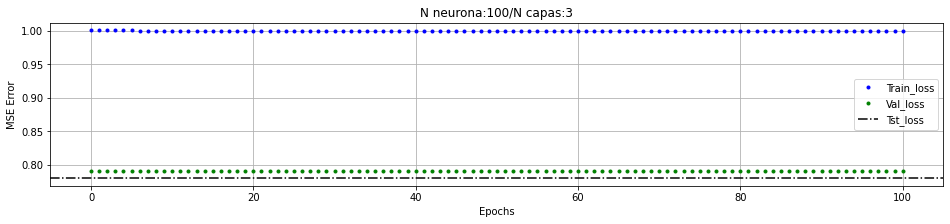

In [ ]:
minval = []
mintrain = []
labels=[]
neuronas = [10,50,100]
profundidades = [1,3]
for neurona in neuronas:
  for prof in profundidades:
    htemp,ttemp = train_network_1_c_i(prof,neurona)
    min_temp = np.min(htemp.history["val_loss"])
    min=100000
    for index,val in enumerate(htemp.history["val_loss"]):
      if val <= min:
        min=val
        ind=index
    minval.append(htemp.history["val_loss"][ind])
    mintrain.append(htemp.history["loss"][ind])
    labels.append("Neur: "+str(neurona) + "/Capas:"+str(prof))
    plt.title("N neurona:"+str(neurona) + "/N capas:"+str(prof))
    plt.plot(htemp.history["loss"],"b.",label="Train_loss")
    plt.plot(htemp.history["val_loss"],"g.",label="Val_loss")
    plt.axhline(y=ttemp,color="k",linestyle="-.",label="Tst_loss")
    plt.xlabel("Epochs"),plt.ylabel("MSE Error")
    plt.legend(),plt.grid()
    plt.savefig(f"{images_dir}/1cI/N neurona:"+str(neurona) + ",N capas:"+str(prof)+".png")
    plt.show()
    # print("Train Loss: "+str(htemp.history["loss"][-1])[:5]+", Val Loss: "+str(htemp.history["val_loss"][-1])[:5]+", Test Loss: "+str(ttemp)[:5])
    #h_t.append([htemp,ttemp])
    #min_vals.append(min_temp)


#h1,t1=train_network_1_c_i(3,100)
#min_val_loss_1=np.min(h1.history["val_loss"])
#graph_results([h1.history,h1.history, h1.history],[t1,t1, t1],["asd","qwe", "sdf"])

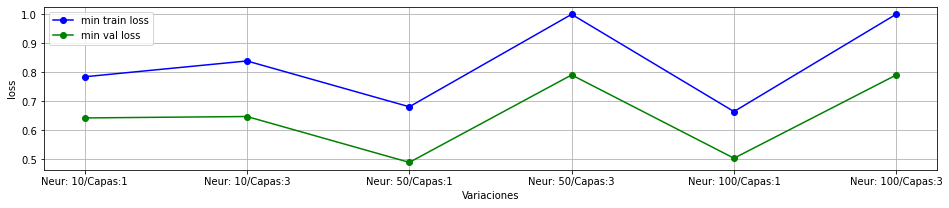

In [ ]:
plt.plot(labels,mintrain,"-o",color="b",label="min train loss")
plt.plot(labels,minval,"-o",color="g",label="min val loss")
plt.xlabel("Variaciones")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

### Respuesta
El menor error de validación está dado por los modelos de 1 capa con 50 y 100 neuronas. Ninguna de las 2 presenta sobreajuste. De entre los 2, la mejor opción es la de 50 neuronas , 1 capa.

Se evalúa el modelo a partir de su mejor error de validación, porque esa es la métrica que se monitorea durante el entrenamiento. Luego de entrenado el modelo se guardan los mejores pesos en el instante que el modelo tiene un mínimo de error de validación.

El error de testing solo es una evaluación con el conjunto de testing en el modelo con el mejor error de validación encontrado,. Cabe decir, que el mejor error de validación no está necesaiamente en el último epoch.


##### II) **Realice** un experimento similar, ahora variando el learning rate entre [1e-6 y 1e-1], entrene 6 redes neuronales con distintos learning rate. Para esto **implemente una función** semejante a la utilizada en el punto anterior, use la arquitectura e hiperparámetros dados. **Encuentre el learning rate que obtiene el menor error de validación. Visualizar y comentar**

In [ ]:
def train_network_lr(lr):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=SGD(learning_rate=lr),loss='mean_squared_error')
  my_callbacks = [History(), # Returns validation and training loss
      tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return hist,test_loss

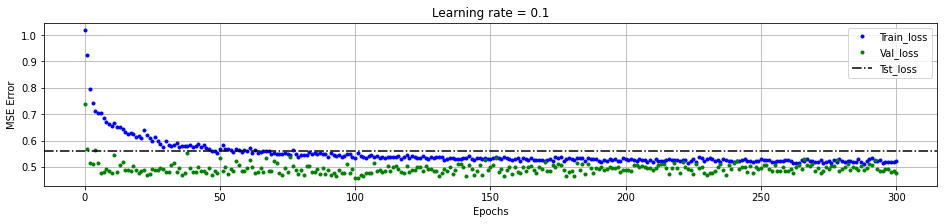

Train Loss: 0.520, Val Loss: 0.477, Test Loss: 0.559


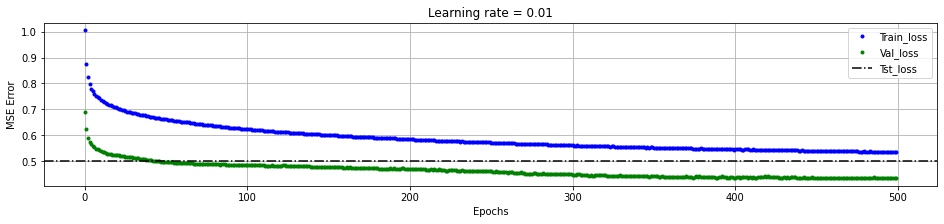

Train Loss: 0.535, Val Loss: 0.435, Test Loss: 0.502


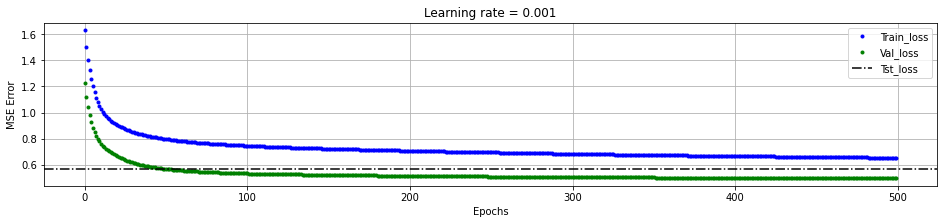

Train Loss: 0.653, Val Loss: 0.496, Test Loss: 0.570


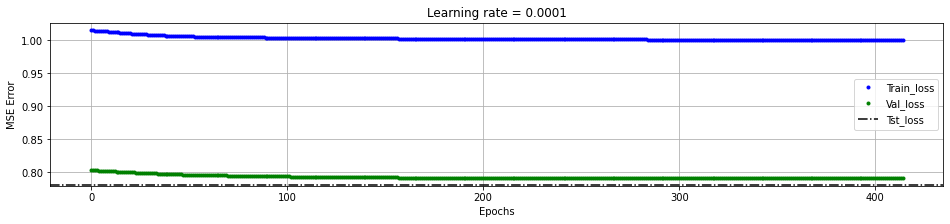

Train Loss: 1.000, Val Loss: 0.790, Test Loss: 0.780


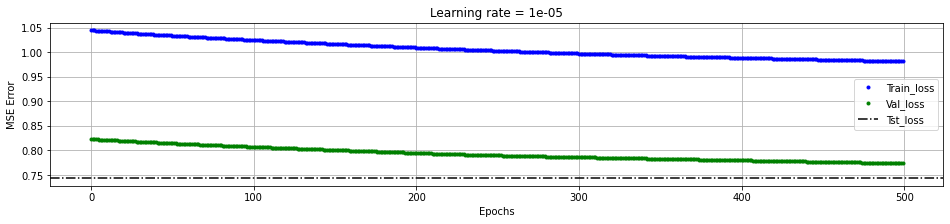

Train Loss: 0.981, Val Loss: 0.773, Test Loss: 0.743


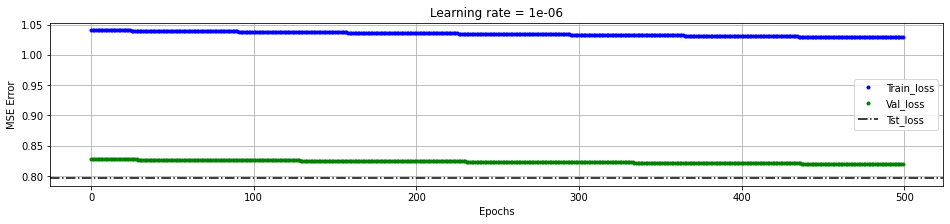

Train Loss: 1.028, Val Loss: 0.819, Test Loss: 0.796


In [ ]:
lr_vals = [1e-1,1e-2,1e-3,1e-4,1e-5,1e-6]
minval = []
mintrain = []
labels=[]
for lr in lr_vals:
  htemp,ttemp = train_network_lr(lr)
  min_temp = np.min(htemp.history["val_loss"])
  min=100000
  for index,val in enumerate(htemp.history["val_loss"]):
    if val <= min:
      min=val
      ind=index
  minval.append(htemp.history["val_loss"][ind])
  mintrain.append(htemp.history["loss"][ind])
  labels.append("L Rate = "+str(lr))
  min_temp = np.min(htemp.history["val_loss"])
  plt.title("Learning rate = "+str(lr))
  plt.plot(htemp.history["loss"],"b.",label="Train_loss")
  plt.plot(htemp.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=ttemp,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.savefig(f"{images_dir}/1cII/Learning rate = "+str(lr)+".png")
  plt.show()
  print("Train Loss: "+str(htemp.history["loss"][-1])[:5]+", Val Loss: "+str(htemp.history["val_loss"][-1])[:5]+", Test Loss: "+str(ttemp)[:5])
    

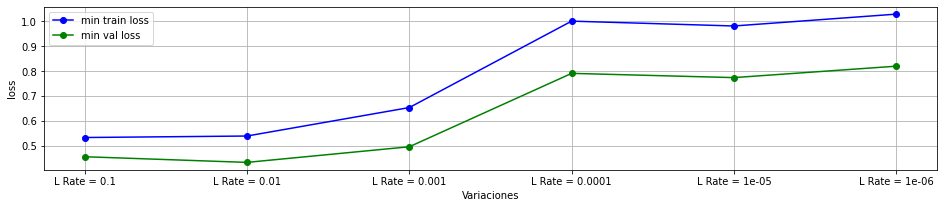

In [ ]:
plt.plot(labels,mintrain,"-o",color="b",label="min train loss")
plt.plot(labels,minval,"-o",color="g",label="min val loss")
plt.xlabel("Variaciones")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

### Respuesta

El modelo con L Rate de 0.01 obtiene el mejor error de validación de entre los otros modelos. La tendencia de su error no demuestra un claro avance al sobreajuste, dado que los epochs disminuyen tanto el val como el  train loss.

Se puede considerar al 2do mejor L Rate, el de 0.1, como un buen modelo que se comporta mejor al avanzar los errores, ya que estos tienden a disminuir, pero dado la alta taza de crecimiento vemos saltos y dispersion en el loss.

Los otros modelos tambien tienden a disminuir sus errores, pero al hacerlo tan lento, se necesitaría una cantidad injustificada de epochs para obtener buenos resultados, además de correr el riesgo de caer en algún minimo local y estancar el entrenamiento.

##### III) **Realice** un experimento similar, ahora variando el learning decay, entrene 6 redes neuronales para distintos decay. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Encuentre el learning decay que obtiene el menor error de validación. Visualizar y comentar**

In [ ]:
lear_decay = np.logspace(-6,0,6)
lear_decay=np.around(lear_decay,decimals=6)
def train_network_decay(ldecay):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=SGD(learning_rate=0.01,decay=ldecay),loss='mean_squared_error')

  my_callbacks = [History(), # Returns validation and training loss
      tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss", # Mantener patience en 200
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return hist,test_loss

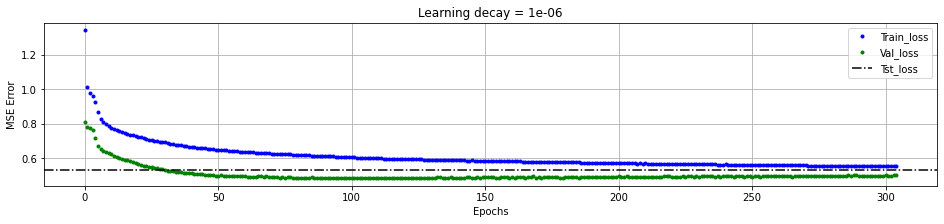

Train Loss: 0.552, Val Loss: 0.500, Test Loss: 0.530


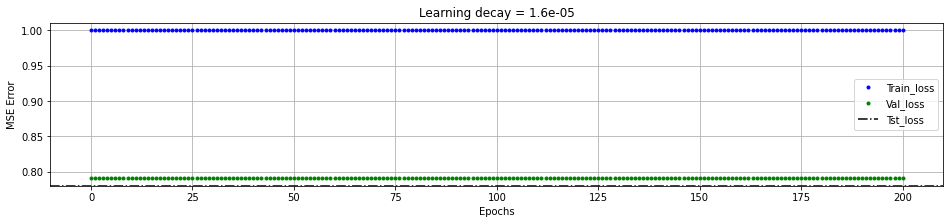

Train Loss: 1.000, Val Loss: 0.790, Test Loss: 0.780


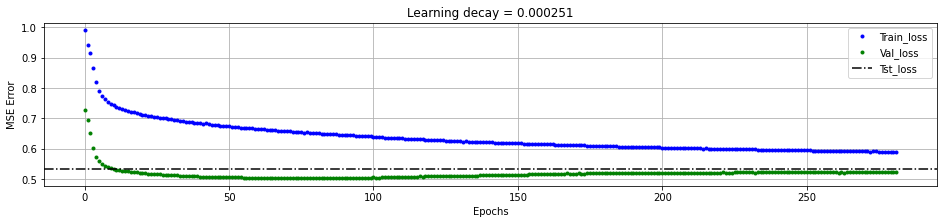

Train Loss: 0.589, Val Loss: 0.524, Test Loss: 0.535


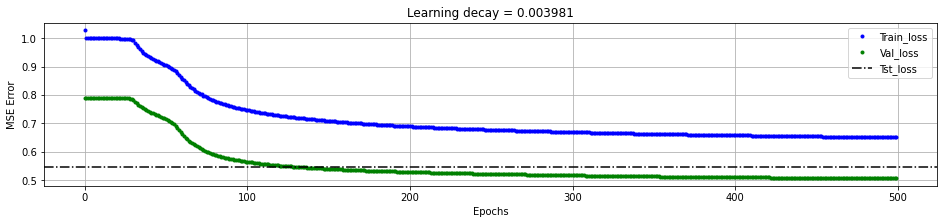

Train Loss: 0.651, Val Loss: 0.506, Test Loss: 0.545


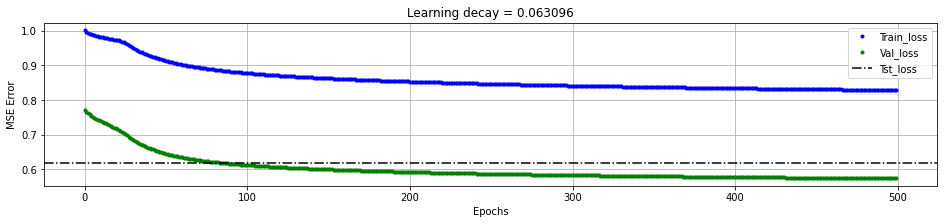

Train Loss: 0.828, Val Loss: 0.573, Test Loss: 0.617


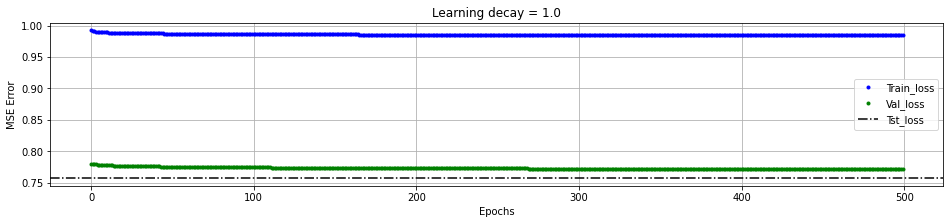

Train Loss: 0.984, Val Loss: 0.771, Test Loss: 0.756


<Figure size 1152x216 with 0 Axes>

In [ ]:
minval = []
mintrain = []
labels=[]
lear_decay = np.logspace(-6,0,6)
lear_decay=np.around(lear_decay,decimals=6)
for ldecay in lear_decay:
  htemp,ttemp = train_network_decay(ldecay)
  min=100000
  for index,val in enumerate(htemp.history["val_loss"]):
    if val <= min:
      min=val
      ind=index
  minval.append(htemp.history["val_loss"][ind])
  mintrain.append(htemp.history["loss"][ind])
  labels.append("Learning decay = "+str(ldecay))
  min_temp = np.min(htemp.history["val_loss"])
  min_temp = np.min(htemp.history["val_loss"])
  plt.title("Learning decay = "+str(ldecay))
  plt.plot(htemp.history["loss"],"b.",label="Train_loss")
  plt.plot(htemp.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=ttemp,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()
  plt.savefig(f"{images_dir}/1cIII/Learning decay = "+str(ldecay)+".png")
  print("Train Loss: "+str(htemp.history["loss"][-1])[:5]+", Val Loss: "+str(htemp.history["val_loss"][-1])[:5]+", Test Loss: "+str(ttemp)[:5])

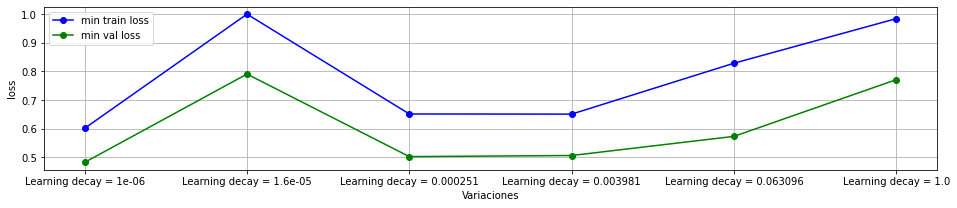

In [ ]:
plt.plot(labels,mintrain,"-o",color="b",label="min train loss")
plt.plot(labels,minval,"-o",color="g",label="min val loss")
plt.xlabel("Variaciones")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

### Respuesta
El modelo con menor error de validación es aque con el learning decay más pequeño.(1e-06). El 2do modelo con menor L Decay (0.000251) se comporta de forma similar al primero, pero obitnene mejor error de testing, lo que indica una mejor capacidad de generalizar.

Se da cuenta de que a mayor learning decay, el entrenamiento se hace más lento con el paso de cada epoch, por tanto los resultados no son óptimos.

##### IV) **Realice** un experimento similar, ahora variando el optimizador para la arquitectura e hiperparámetros dados, pruebe con los optimizadores [SGD, Adagrad, Adadelta, Adam y RMSprop]. Para esto **implemente una función** semejante a la utilizada en el punto anterior. **Pregunta:** ¿En qué optimizadores no tiene sentido utilizar el learning decay, por qué? **Visualizar y comentar**

In [ ]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

def train_network_optimizer(opti):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=opti(learning_rate=0.001),loss='mean_squared_error')
  # Define callbacks
  my_callbacks = [History(), 
      tf.keras.callbacks.EarlyStopping(patience=500,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return hist,test_loss

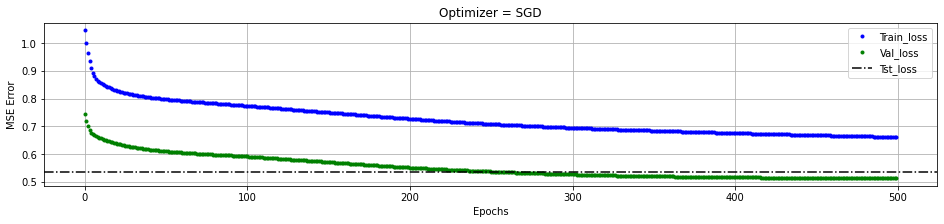

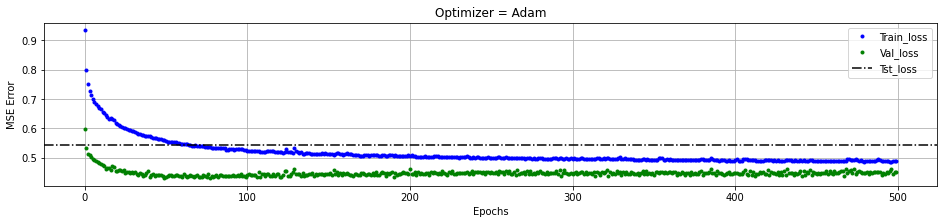

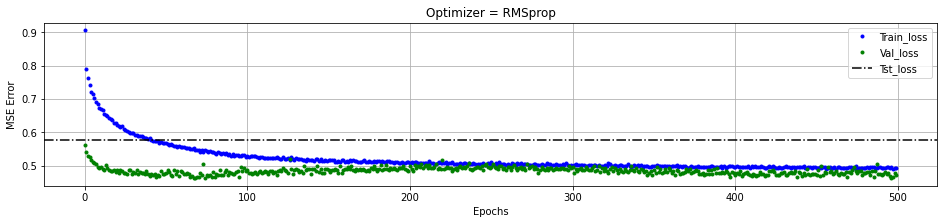

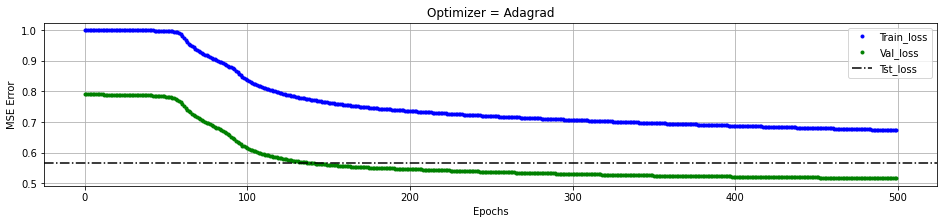

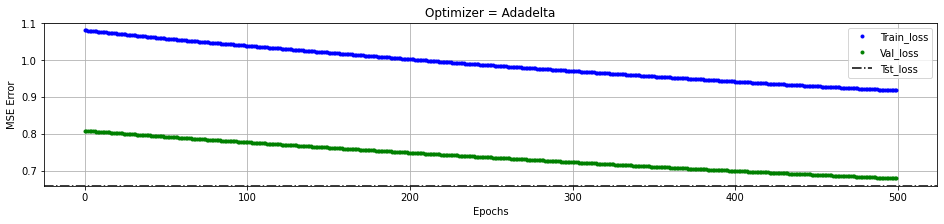

In [ ]:
optimizers=[SGD, Adam, RMSprop, Adagrad, Adadelta]
labels=["SGD","Adam", "RMSprop", "Adagrad", "Adadelta"]
minval = []
mintrain = []
for i,opti in enumerate(optimizers):
  htemp,ttemp = train_network_optimizer(opti)
  min=100000
  for index,val in enumerate(htemp.history["val_loss"]):
    if val <= min:
      min=val
      ind=index
  minval.append(htemp.history["val_loss"][ind])
  mintrain.append(htemp.history["loss"][ind])
  min_temp = np.min(htemp.history["val_loss"])
  plt.title("Optimizer = "+str(labels[i]))
  plt.plot(htemp.history["loss"],"b.",label="Train_loss")
  plt.plot(htemp.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=ttemp,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()

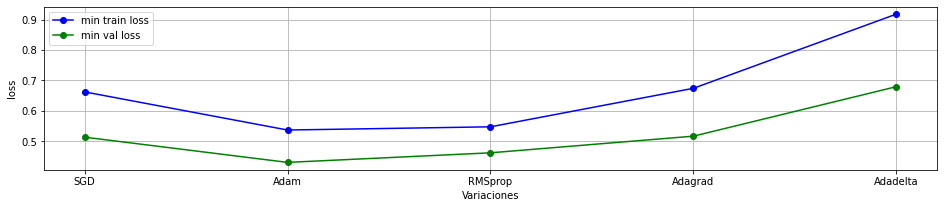

In [ ]:
plt.plot(labels,mintrain,"-o",color="b",label="min train loss")
plt.plot(labels,minval,"-o",color="g",label="min val loss")
plt.xlabel("Variaciones")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

### Respuesta
Sabemos que en Adam, Adagrad y RMSprop no es necesario un learning decay, pues sus propias implementaciones estan diseñadas para lograr esta caida en el learning rate. 

RMSprop tiende al sobreajuste, y adam mantiene sus errores de entrenamiento y calidación constantes con el paso de los epochs

El mejor error de calidación se obtiene con el optimizador Adam, seguido de RMSprop.

##### V) **Realice** un expermiento similar, ahora variando el batch_size entre 1 y x_tr.shape[0] incluyendo los extremos. Entrene 6 redes neuronales con la arquitectura e hiperparámetros dados. Para esto **implemente una función** semejante a la utilizada en el punto anterior. Para un batch_size=1 el entrenamiento se va a demorar más que en puntos anteriores, aprox. 1 segundo en _Colab_. **Visualizar y comentar**. **Preguntas:** ¿A qué es equivalente entrenar con un batch_size = 1 y batch_size=x_tr.shape[0]? ¿Cuál es el batch_size por default?

In [ ]:
n_batches=6
batches=np.round(np.linspace(1,x_tr.shape[0],n_batches))
def train_network_batch_size(b_size):
  input_dense= input_layer.Input(shape=(x_tr.shape[1]))
  dense=layers.Dense(50, activation='relu',use_bias=True)(input_dense)
  dense=layers.Dense(50, activation='relu',use_bias=True)(dense)
  output_dense=layers.Dense(1, activation='relu',use_bias=True)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
  # Define callbacks
  my_callbacks = [History(), 
      tf.keras.callbacks.EarlyStopping(patience=100,monitor="val_loss", # (No modificar patience!!!!!!!!!)
                                      restore_best_weights=True)]
  hist = model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=b_size,validation_data=(x_val, y_val),callbacks=my_callbacks)
  test_loss=tf.math.reduce_mean(tf.keras.losses.MSE(y_test, model(x_test))).numpy()
  return hist,test_loss

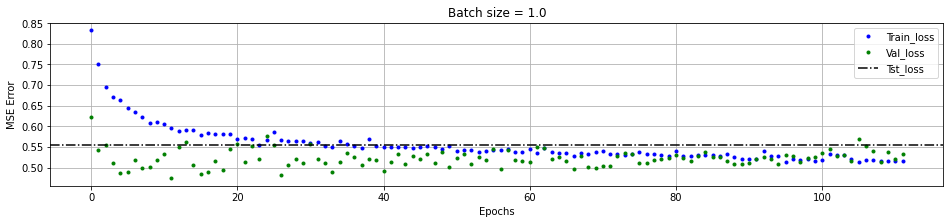

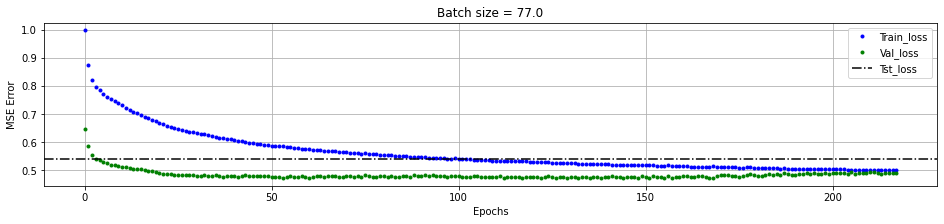

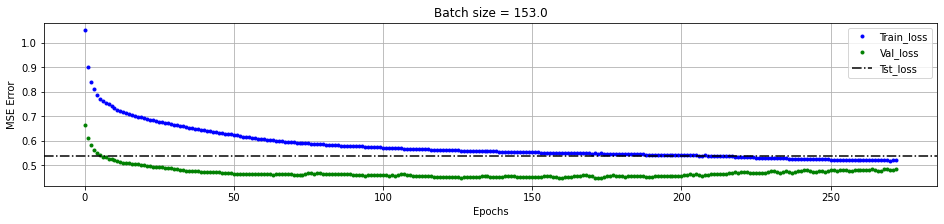

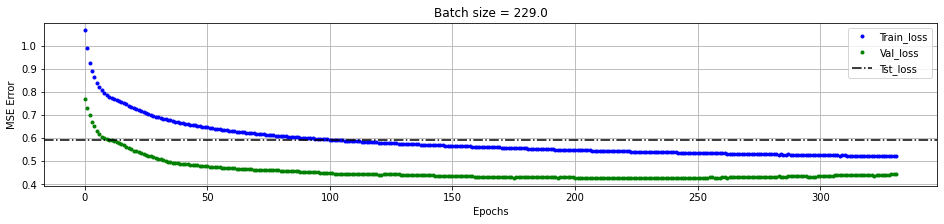

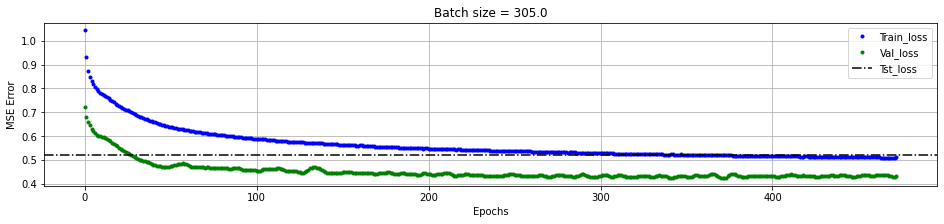

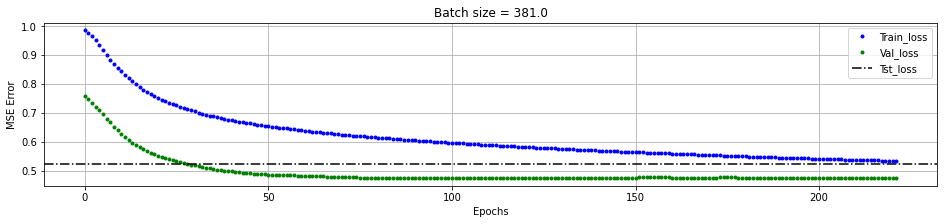

In [ ]:
minval = []
mintrain = []
labels=[]
n_batches=6
batches=np.round(np.linspace(1,x_tr.shape[0],n_batches))
for b_size in batches:
  htemp,ttemp = train_network_batch_size(int(b_size))
  min_temp = np.min(htemp.history["val_loss"])
  min=100000
  for index,val in enumerate(htemp.history["val_loss"]):
    if val <= min:
      min=val
      ind=index
  minval.append(htemp.history["val_loss"][ind])
  mintrain.append(htemp.history["loss"][ind])
  labels.append("Batch size = "+str(b_size))
  plt.title("Batch size = "+str(b_size))
  plt.plot(htemp.history["loss"],"b.",label="Train_loss")
  plt.plot(htemp.history["val_loss"],"g.",label="Val_loss")
  plt.axhline(y=ttemp,color="k",linestyle="-.",label="Tst_loss")
  plt.xlabel("Epochs"),plt.ylabel("MSE Error")
  plt.legend(),plt.grid()
  plt.show()


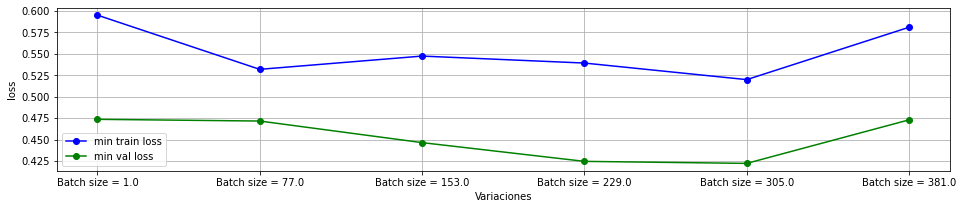

In [ ]:
plt.plot(labels,mintrain,"-o",color="b",label="min train loss")
plt.plot(labels,minval,"-o",color="g",label="min val loss")
plt.xlabel("Variaciones")
plt.ylabel("loss")
plt.grid()
plt.legend()
plt.show()

### Respuesta 

Los mejores errores de validación se dan con batch size de 229 y 305. 

Para batch size = 1, es decir stochastic gradient descent, los errores aumentan, lo cual puede deberse a la gran cantidad de outliers provenientes del input. 

Para batch size = x_tr.shape[0], es llamado tambien Batch Gradient Descent, y entrena en cada iteración con todos los datos del conjutno de entrenaiento. Esto requiere de más memoria para conjuntos grandes, y no considera del todo los patrones excepcionales de comportamiento (outliers)

El batch size por defecto es 32.

Se puede resaltar, que a menor batch size, el error de validación tiende a aumentar durante el entrenamiento, mientras que con batchsize más grandes, se mantiene estable (pero no baja).

## 1.d Inicializaciones, pesos y gradientes

##### I) Utilizando las siguientes arquitecturas proceda a graficar la distribución de pesos de las distintas capas bajo inicialización uniforme (incluyendo bias). Adicionalmente calcule el gradiente de la función de pérdida (loss) para el conjunto de entrenamiento (promedio del gradiente del error de todos los datos de entrenamiento) respecto a los pesos en las distintas capas. **Visualize, compare y comente**

In [ ]:
# Define architecture (1)
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)

# # Define architecture (2)
# input_dense= input_layer.Input(shape=(8))
# dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(input_dense)
# dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
# dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
# dense=layers.Dense(100, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
# output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
# model=models.Model(inputs=input_dense, outputs=output_dense)

# Get weights
weights=model.get_weights()
# Get gradient
with tf.GradientTape() as tape:
  y_pred= model(x_tr)
  loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
  grad=tape.gradient(loss,model.trainable_weights) 
# gradient only calculated, if u want to apply it to update weights the model must have an optimizer, for example set model.optimizer=tf.keras.optimizers.Adam(lr) 
# and then use: model.optimizer.apply_gradients(zip(grad, model.trainable_variables)) to update weights. Equivalent to an epoch of maximum batch size (all training set) in this code
# model.compile and model.fit does this, with extra implementations, like variable batch size,
# so it's not necessary to do it manually in this case. If u pay attention to the code all the flow of information is in the form
# of tensors. This setup can be necessary in the case that u want to implement a custom loss that use exogenous variables to compute the loss, other than only y_pred and y_true
# for the best of my knowledge u can define a custom loss to use in model.compile and model.fit, but only if u are using this two variables (y_true,y_pred),
# exogenous variables are not supported

# As example, if u want to define a mean quintic error loss, only using y_pred and y_true and want to keep all the cool functionalities, as callbacks, from model.compile
# and model.fit:
# def custom_loss(y_true,y_pred):
#   return(tf.reduce_mean(tf.math.pow(y_true-y_pred,5)))
# model.compile (optimizer='rmsprop',loss="custom_loss")
# model.fit(x_tr, y_tr, epochs=500, verbose=0, batch_size=?,validation_data=(x_val, y_val),callbacks=my_callbacks)

In [ ]:
# To understand where are the weights and number of weights:
model.summary()

Model: "functional_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_32 (InputLayer)        [(None, 8)]               0         
_________________________________________________________________
dense_91 (Dense)             (None, 100)               900       
_________________________________________________________________
dense_92 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_93 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_94 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 101       
Total params: 31,301
Trainable params: 31,301
Non-trainable params: 0
_________________________________________________

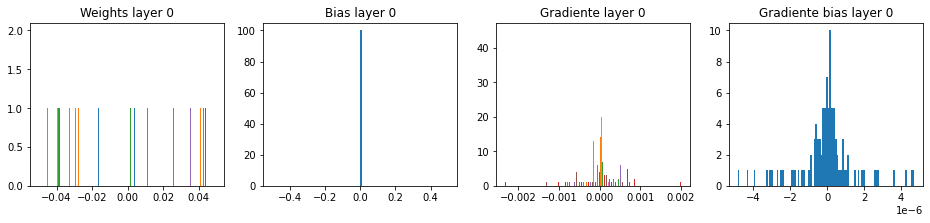

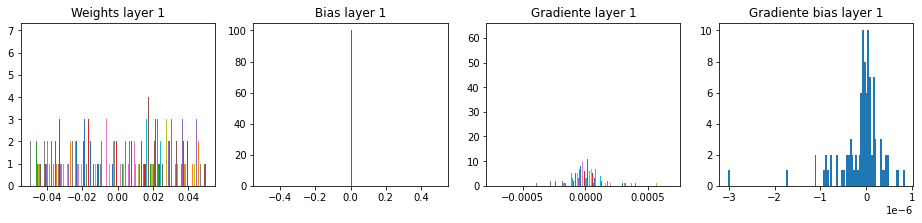

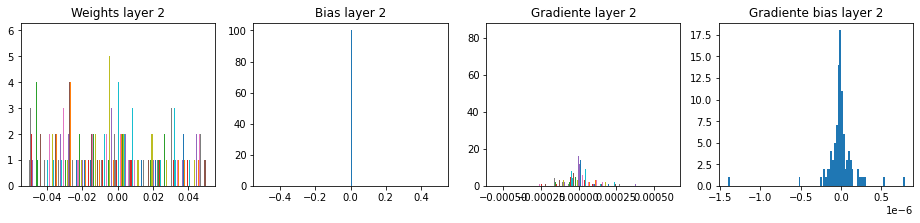

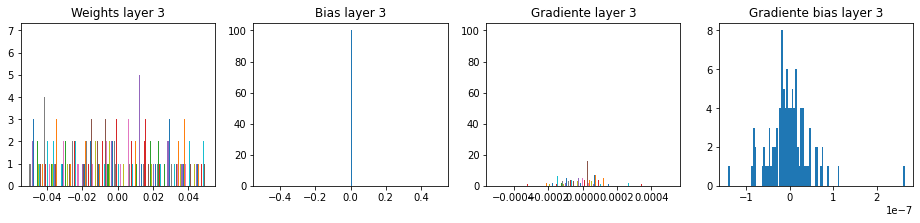

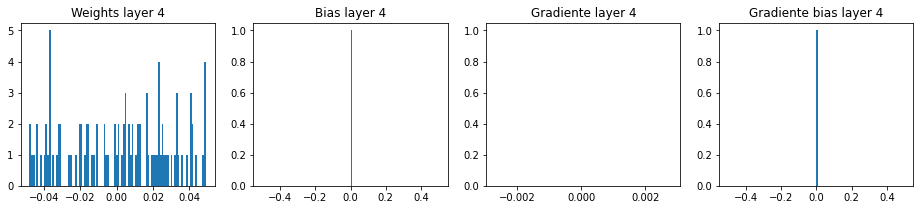

In [ ]:
for i in range(5):
  plt.rcParams["figure.figsize"]=[16,3]
  plt.subplot(1,4,1)
  plt.title("Weights layer "+str(i))
  plt.hist(weights[::2][i],bins=100)
  plt.subplot(1,4,2)
  plt.title("Bias layer "+str(i))
  plt.hist(weights[1::2][i],bins=100)
  plt.subplot(1,4,3)
  plt.title("Gradiente layer "+str(i))
  plt.hist(grad[::2][i],bins=100)
  plt.subplot(1,4,4)
  plt.title("Gradiente bias layer "+str(i))
  plt.hist(grad[1::2][i],bins=100)
  plt.show()


### Respuesta
Visualizando los graficos vemos una clara tendencia a la distribucion uniforme, siendo valores aleatorios en un rango definido.

En este caso ademas, los gradientes se calculan a travez del error obtenido al predecir con una red no entrenada, motivo que no demuestra un comportamiento estable. 

##### II) Repita el experimento para las inicializaciones de kernel HE_uniform, Glorot normal y Glorot uniform. **Visualice, comente, y compare** 

**Pregunta** ¿Es posible inicializar los bias? ¿Cómo sería el código?

In [ ]:
def model_initializer(initializer):
  input_dense= input_layer.Input(shape=(8))
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=initializer)(input_dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=initializer)(dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=initializer)(dense)
  dense=layers.Dense(100, activation='tanh',use_bias=True, kernel_initializer=initializer)(dense)
  output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer=initializer)(dense)
  model=models.Model(inputs=input_dense, outputs=output_dense)
  return model


In [ ]:
def plot_WG(weights, grad, title):
  for i in range(5):
    plt.rcParams["figure.figsize"]=[16,3]
    plt.subplot(1,4,1)
    plt.title(title+" Weights layer "+str(i))
    plt.hist(weights[::2][i],bins=100)
    plt.subplot(1,4,2)
    plt.title(title+" Bias layer "+str(i))
    plt.hist(weights[1::2][i],bins=100)
    plt.subplot(1,4,3)
    plt.title(title+" Gradiente layer "+str(i))
    plt.hist(grad[::2][i],bins=100)
    plt.subplot(1,4,4)
    plt.title(title+" Gradiente bias layer "+str(i))
    plt.hist(grad[1::2][i],bins=100)
    plt.show()

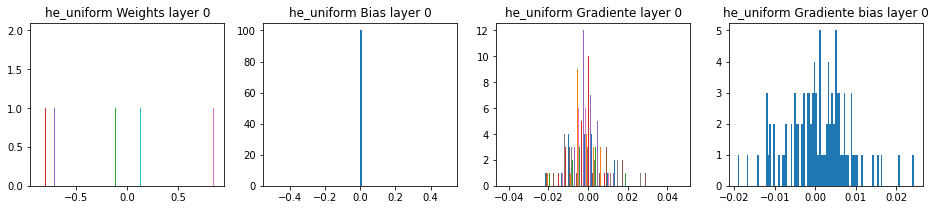

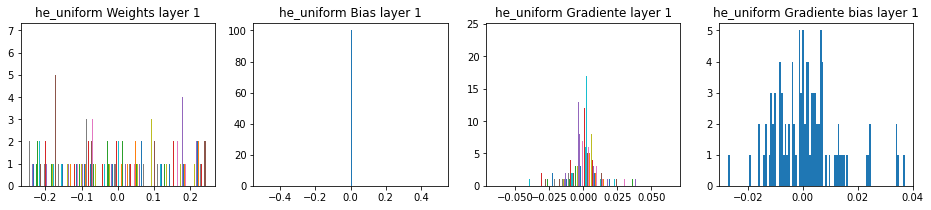

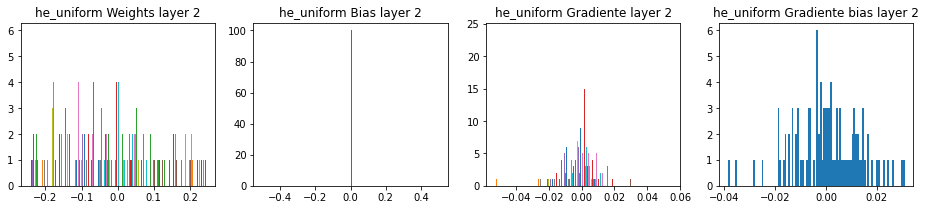

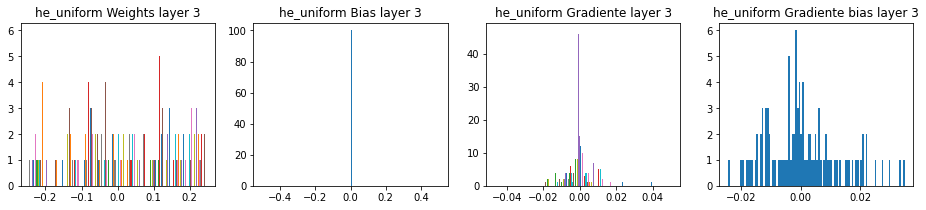

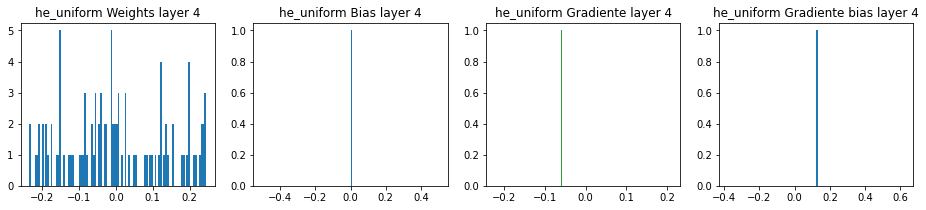

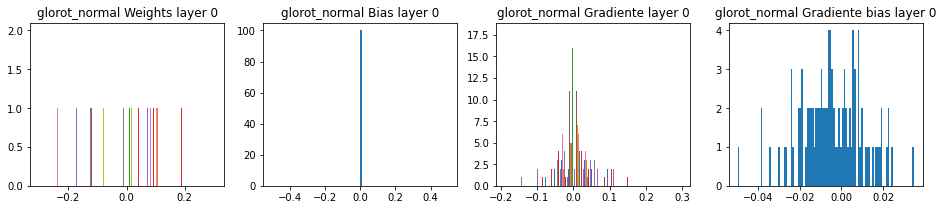

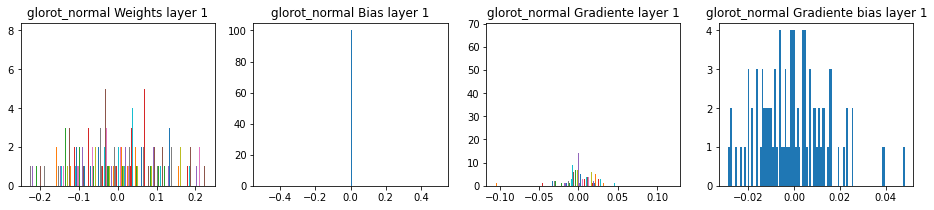

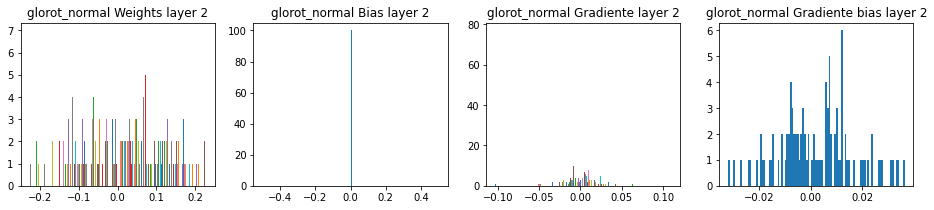

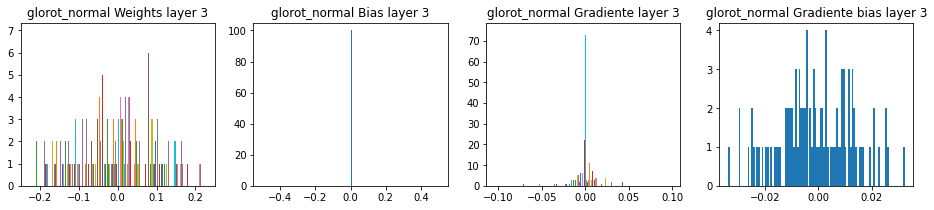

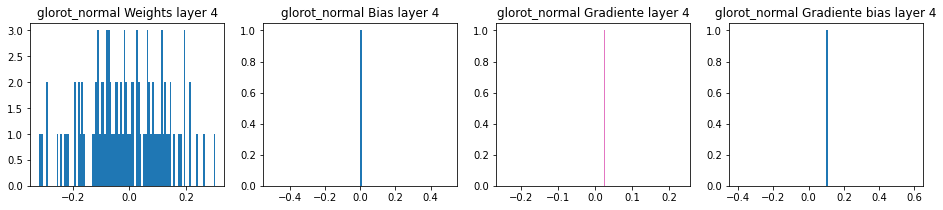

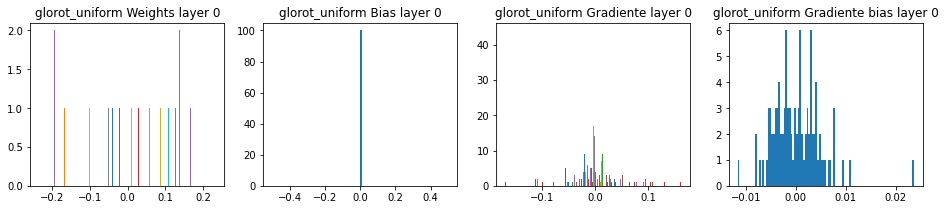

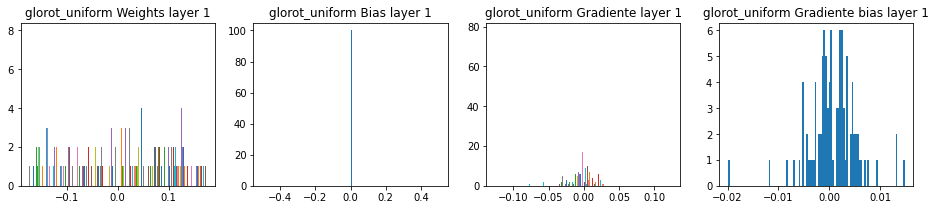

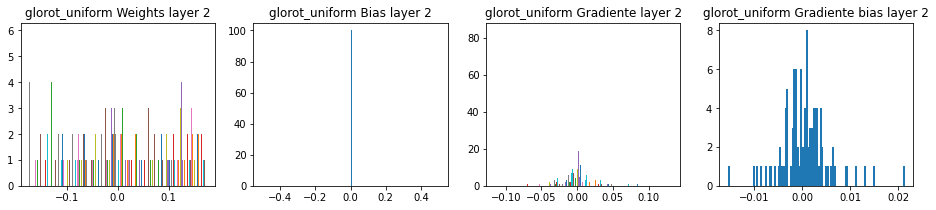

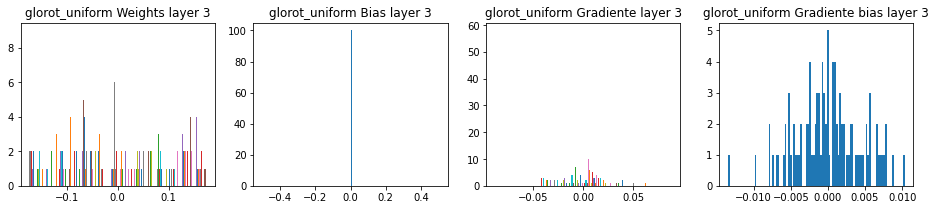

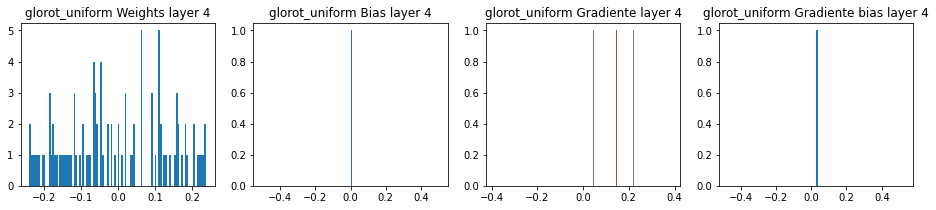

In [ ]:
kernel_initializer=['he_uniform','glorot_normal','glorot_uniform']
for initializer in kernel_initializer:
  model=model_initializer(initializer)
  weights=model.get_weights()
  with tf.GradientTape() as tape:
    y_pred= model(x_tr)
    loss = tf.reduce_mean(tf.square(y_pred-y_tr)) #MSE loss
    grad=tape.gradient(loss,model.trainable_weights) 
  plot_WG(weights, grad, initializer)


### Respuesta
En esta seccion vemos claramente el tipo de inicializacion de los pesos en cada capa, mostrando la distribucion usada.
De manera similar a la anterior, los gradientes estan calculados con la prediccion de una red sin entrenar, por lo que los valores no representan como se deberian comportar en un modelo bien aplicado.

##### III) Utilizando las arquitecturas siguientes. **Recolecte** los pesos y gradientes al inicializar, **entrene** la red neuronal, y **recolecte** nuevamente los pesos y gradientes, junto a los errores de entrenamiento, validación y test. (En la medida de lo posible!). **Visualice, compare y comente**. Ciertos conceptos ya debiesen salir a colación para explicar lo que está sucediendo.

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               900       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)              

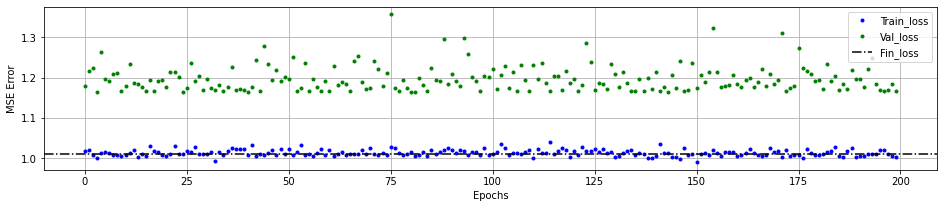

In [11]:
# # 1st arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(input_dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
dense=layers.Dense(100, activation='sigmoid',use_bias=True, kernel_initializer="uniform")(dense)
output_dense=layers.Dense(1, activation='tanh',use_bias=True, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)

# # # 2nd arch
# input_dense= input_layer.Input(shape=(8))
# dense=layers.Dense(1000, activation='tanh',use_bias=False, kernel_initializer="he_uniform")(input_dense)
# output_dense=layers.Dense(1, activation='linear',use_bias=False, kernel_initializer="uniform")(dense)
# model=models.Model(inputs=input_dense, outputs=output_dense)

model.summary()

# Get initial weights
weights_ini=model.get_weights()
# Get initial gradient
with tf.GradientTape() as tape:
  loss_ini = tf.reduce_mean(tf.square(model(x_tr)-y_tr)) #MSE loss
  grad_ini=tape.gradient(loss_ini,model.trainable_weights)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History(),tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss")]) #only history as callback
# Get final weights
weights_fin=model.get_weights()
# Get final gradient
with tf.GradientTape() as tape:
  loss_fin = tf.reduce_mean(tf.square(model(x_tr)-y_tr)) #MSE loss
  grad_fin =tape.gradient(loss_fin,model.trainable_weights)

min_temp = np.min(hist.history["val_loss"])
plt.plot(hist.history["loss"],"b.",label="Train_loss")
plt.plot(hist.history["val_loss"],"g.",label="Val_loss")
plt.axhline(y=loss_fin,color="k",linestyle="-.",label="Fin_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

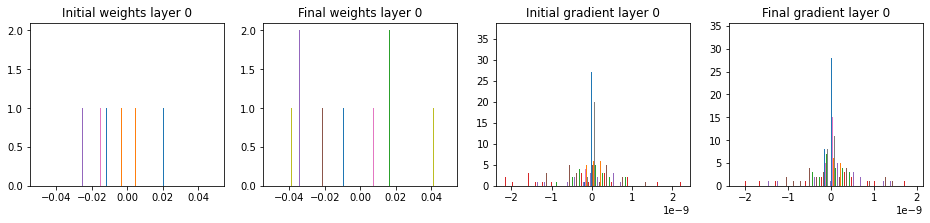

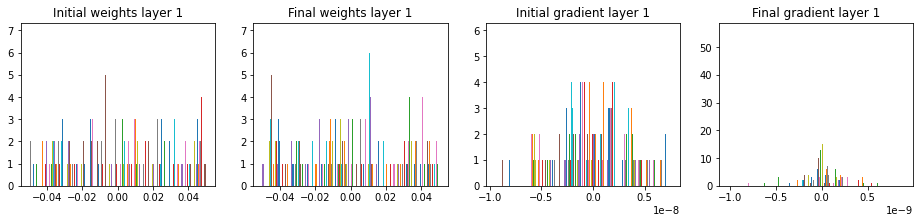

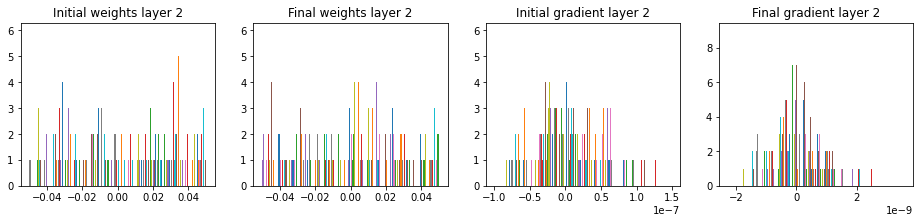

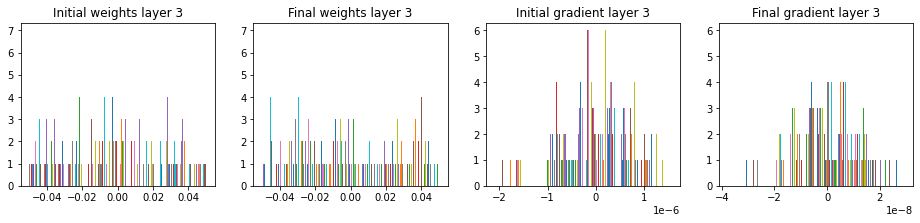

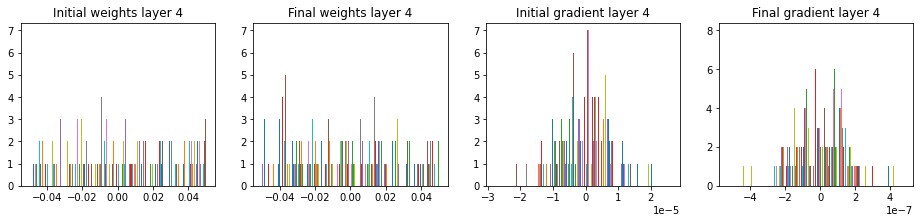

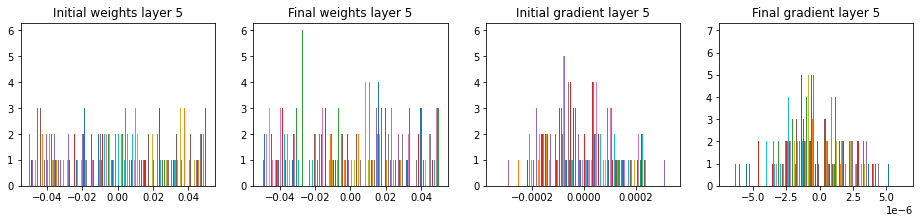

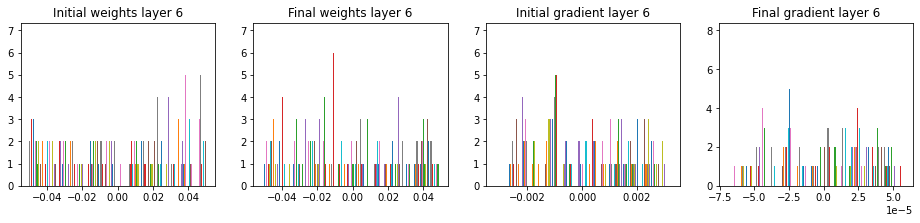

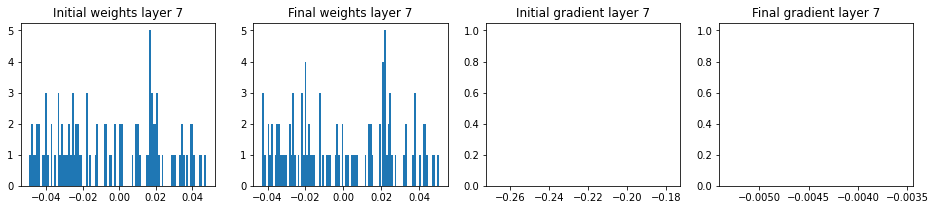

In [ ]:
for i in range(int(len(weights_ini)/2)):
  plt.rcParams["figure.figsize"]=[16,3]
  plt.subplot(1,4,1)
  plt.title("Initial weights layer "+str(i))
  plt.hist(weights_ini[::2][i],bins=100)
  plt.subplot(1,4,2)
  plt.title("Final weights layer "+str(i))
  plt.hist(weights_fin[::2][i],bins=100)
  plt.subplot(1,4,3)
  plt.title("Initial gradient layer "+str(i))
  plt.hist(grad_ini[::2][i],bins=100)
  plt.subplot(1,4,4)
  plt.title("Final gradient layer "+str(i))
  plt.hist(grad_fin[::2][i],bins=100)
  plt.show()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1000)              8000      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 1000      
Total params: 9,000
Trainable params: 9,000
Non-trainable params: 0
_________________________________________________________________


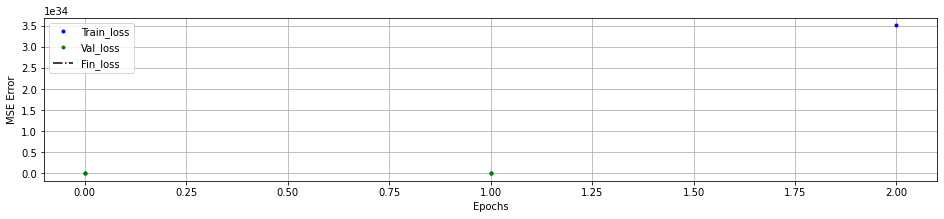

In [17]:
# # 2nd arch
input_dense= input_layer.Input(shape=(8))
dense=layers.Dense(1000, activation='tanh',use_bias=False, kernel_initializer="he_uniform")(input_dense)
output_dense=layers.Dense(1, activation='linear',use_bias=False, kernel_initializer="uniform")(dense)
model=models.Model(inputs=input_dense, outputs=output_dense)
model.summary()

# Get initial weights
weights_ini=model.get_weights()
# Get initial gradient
with tf.GradientTape() as tape:
  loss_ini = tf.reduce_mean(tf.square(model(x_tr)-y_tr)) #MSE loss
  grad_ini=tape.gradient(loss_ini,model.trainable_weights)
# Compile model
model.compile(optimizer=SGD(learning_rate=0.01),loss='mean_squared_error')
# Train model
hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History(),tf.keras.callbacks.EarlyStopping(patience=200,monitor="val_loss")]) #only history as callback
# Get final weights
weights_fin=model.get_weights()
# Get final gradient
with tf.GradientTape() as tape:
  loss_fin = tf.reduce_mean(tf.square(model(x_tr)-y_tr)) #MSE loss
  grad_fin =tape.gradient(loss_fin,model.trainable_weights)

min_temp = np.min(hist.history["val_loss"])
plt.plot(hist.history["loss"],"b.",label="Train_loss")
plt.plot(hist.history["val_loss"],"g.",label="Val_loss")
plt.axhline(y=loss_fin,color="k",linestyle="-.",label="Fin_loss")
plt.xlabel("Epochs"),plt.ylabel("MSE Error")
plt.legend(),plt.grid()
plt.show()

In [13]:
for i in range(int(len(weights_ini)/2)):
  plt.rcParams["figure.figsize"]=[16,3]
  plt.subplot(1,4,1)
  plt.title("Initial weights layer "+str(i))
  plt.hist(weights_ini[::2][i],bins=100)
  plt.subplot(1,4,2)
  plt.title("Final weights layer "+str(i))
  plt.hist(weights_fin[::2][i],bins=100)
  plt.subplot(1,4,3)
  plt.title("Initial gradient layer "+str(i))
  plt.hist(grad_ini[::2][i],bins=100)
  plt.subplot(1,4,4)
  plt.title("Final gradient layer "+str(i))
  plt.hist(grad_fin[::2][i],bins=100)
  plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6630: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6631: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: ignored

Error in callback <function flush_figures at 0x7f4fe0c7ea60> (for post_execute):


KeyboardInterrupt: ignored

### Respuesta
En está seccion, tenemos dos arquitecturas. 

En la primera, tenemos al igual que las anteriores que los pesos de las capas al inicializarse mantienen una distribucion uniforme, pero ademas vemos que los pesos finales no varian mucho luego de entrenar el modelo, este hecho lo relacionamos al comportamiento de los gradientes en la capa final, dado que vemos que estos son demasiado bajos, por lo que no modifican los pesos en las iteraciones del back propagation, este fenomeno se le llama gradient vanishing se debe a la gran cantidad de capas del modelo.

La segunda arquitectura, vemos que existe un problema de explosion de gradiente, por lo que el error tiende a infinito en el tercer epoch, esto debido al resultado de la multiplicacion de la regla de la cadena por un numero mayor que uno y la cantidad de pesos.



## 1.e Regularización

##### i) Utilizando la siguiente arquitectura experimente con regularización l1 y l2 usando distintos valores de $\lambda$ para las distintas capas, pero manteniendo el mismo tipo de regularización en ambas capas (l1 ó l2). **Entrene** 4 redes neuronales para cada norma con distintos valores de $\lambda$ en cada capa (8 redes en total). Utilice las variaciones de $\lambda$ que desee, puede usar las indicadas si desea. **Visualice y comente** los errores de entrenamiento, validación **y la resta de ambos errores** (e.d error_tr-error_val). 

**Pregunta:** ¿Cómo se comportarán los pesos de la red neuronal para la norma l1 y para la norma l2 en función de $\lambda$? **Apoyarse en visualización de los pesos al final del entrenamiento para responder la pregunta.**

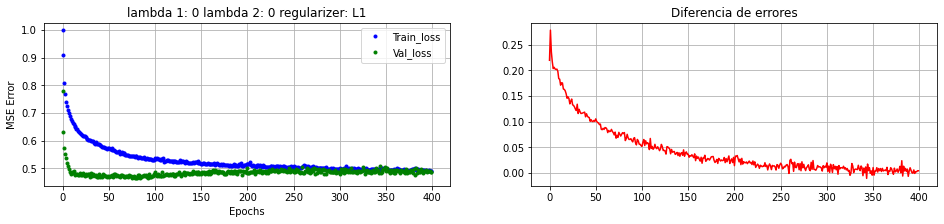

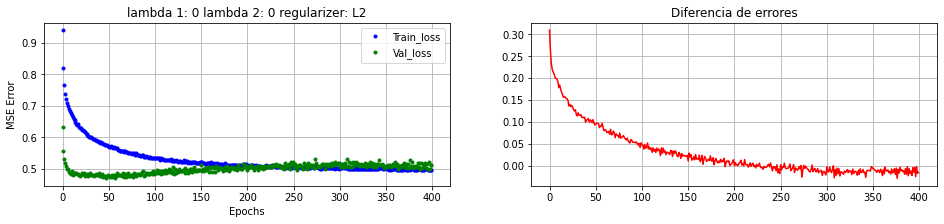

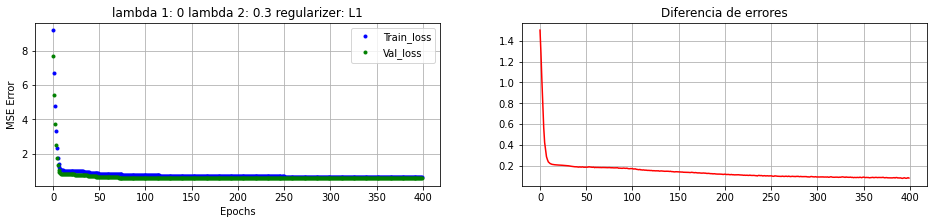

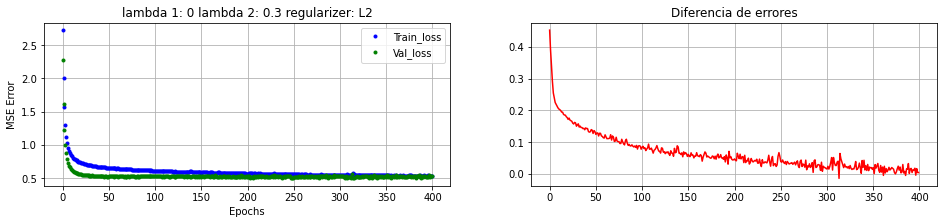

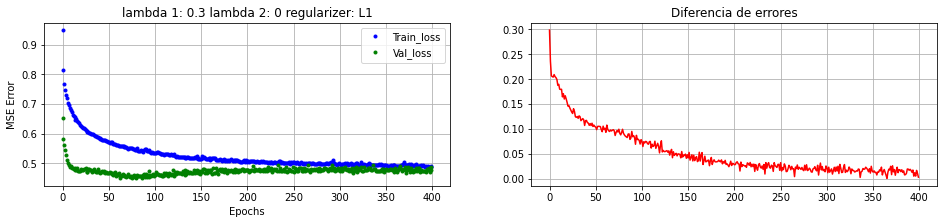

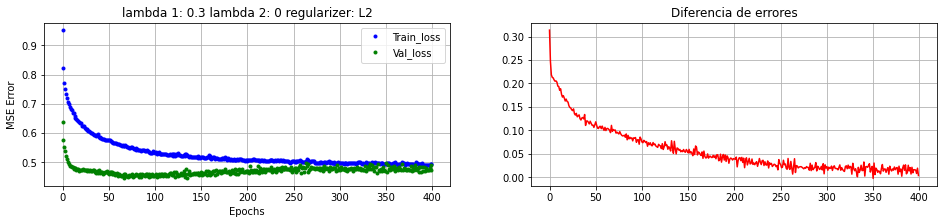

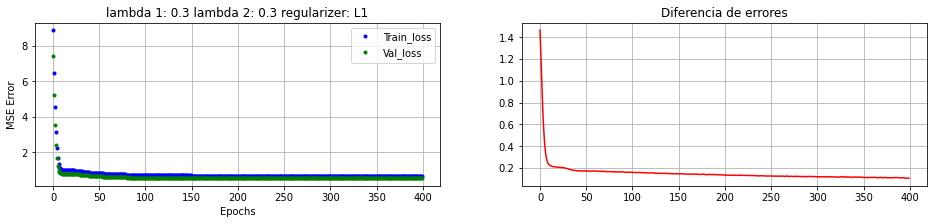

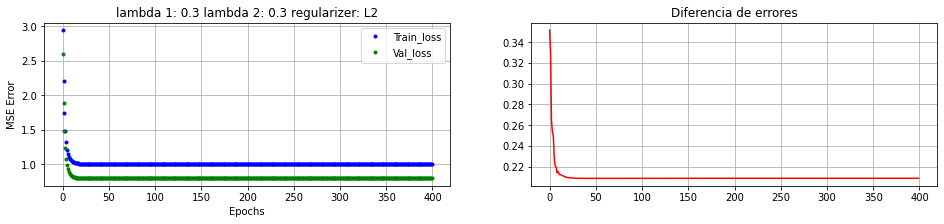

In [ ]:
from keras.regularizers import l1,l2
# Variaciones de lambda: 
# En las dos capas y para cada norma probar las 4 combinaciones:
lambda_1st=[0,0.3]
lambda_2nd=[0,0.3]
regularizer=[l1,l2]
minval = []
mintrain = []
labels=[]
for lam1 in lambda_1st :
  for lam2 in lambda_2nd:
    for regu in regularizer:
      # Define architecture
      input_dense= input_layer.Input(shape=(8))
      dense=layers.Dense(500, activation="relu",activity_regularizer=regu(lam1),use_bias=True, kernel_initializer='glorot_normal')(input_dense)
      dense=layers.Dense(500, activation="relu",activity_regularizer=regu(lam2),use_bias=True, kernel_initializer='glorot_normal')(input_dense)
      output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer='uniform')(dense)
      model=models.Model(inputs=input_dense, outputs=output_dense)
      # Compile model
      model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
      # Train model
      hist = model.fit(x_tr, y_tr, epochs=400, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
      min=100000
      for index,val in enumerate(hist.history["val_loss"]):
        if val <= min:
          min=val
          ind=index
      minval.append(hist.history["val_loss"][ind])
      mintrain.append(hist.history["loss"][ind])
      labels.append("lam1: "+str(lam1)+" lamb2: "+str(lam2)+ " regu: "+str(regu)[-4:-2])
      plt.subplot(1,2,1)
      plt.title("lambda 1: "+str(lam1)+" lambda 2: "+str(lam2)+ " regularizer: "+str(regu)[-4:-2])
      plt.plot(hist.history["loss"],"b.",label="Train_loss")
      plt.plot(hist.history["val_loss"],"g.",label="Val_loss")
      plt.legend(),plt.grid()
      plt.xlabel("Epochs"),plt.ylabel("MSE Error")
      plt.subplot(1,2,2)
      plt.title("Diferencia de errores")
      plt.plot(np.asarray(hist.history["loss"])-np.asarray(hist.history["val_loss"]),"r")
      plt.grid()
      plt.show()


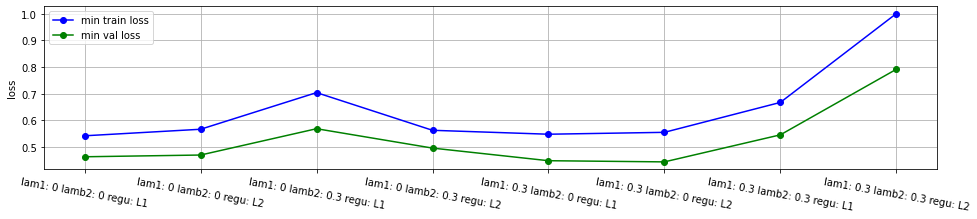

In [ ]:
plt.plot(labels,mintrain,"-o",color="b",label="min train loss")
plt.plot(labels,minval,"-o",color="g",label="min val loss")
plt.ylabel("loss")
plt.xticks(rotation=-10)
plt.grid()
plt.legend()
plt.show()

### Respuesta
Al usar regularizadores, lo que hacemos es penalizar la complejidad del modelo, esto mediante un aumento en el error cuando el valor de los parametros es muy alto.

Vemos en los graficos que las mejores aproximaciones se hacen cuando se regualariza la primera capa para ambosregularizadores, mientras que si se regulariza la segunda o ambas, el error tiende a subir.
En este caso los mejores resultados se dan cuando se usa L2 con $\lambda 1 = 0.3$ y $\lambda 2 = 0$.

##### II) Experimentaremos con el método dropout. Probaremos con distintos valores de Dropout para ambas capas de la arquitectura presentada, de manera similar al punto anterior. Entrene 9 redes neuronales utilizando las combinaciones indicadas. **Visualizar, comparar y comentar** utilizando los errores de entrenamiento, validación y la resta entre ambos valores.

**Preguntas:** ¿Qué es/hace dropout? ¿Por qué es considerado un método de regularización?

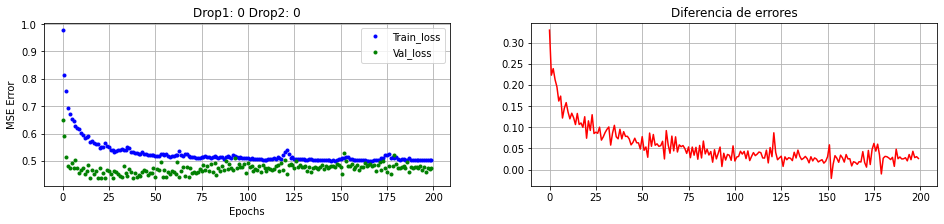

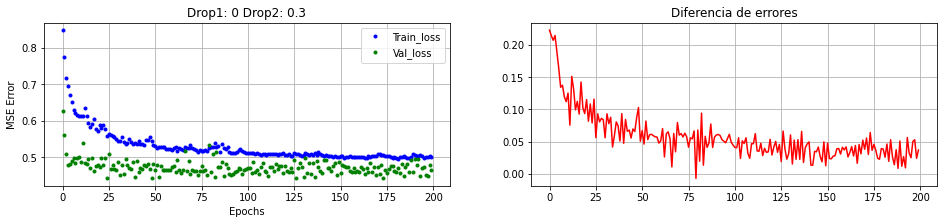

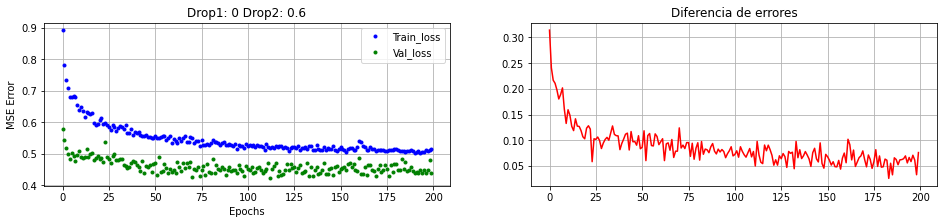

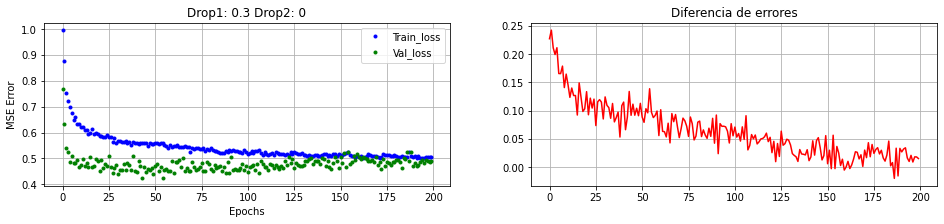

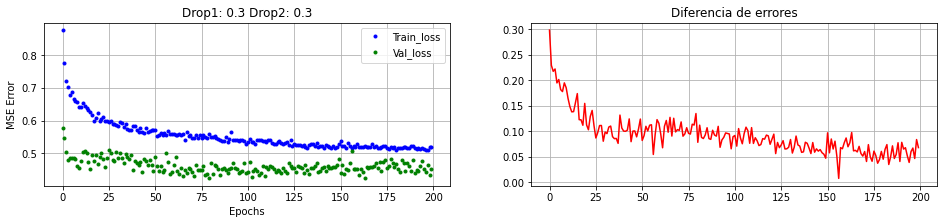

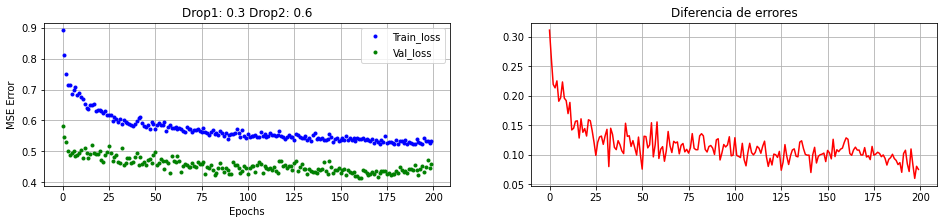

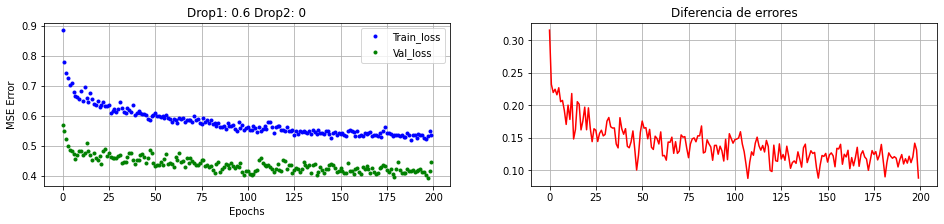

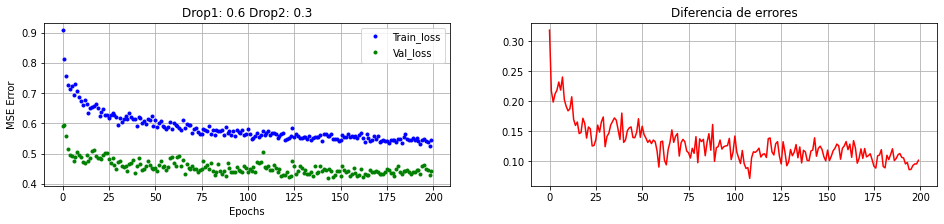

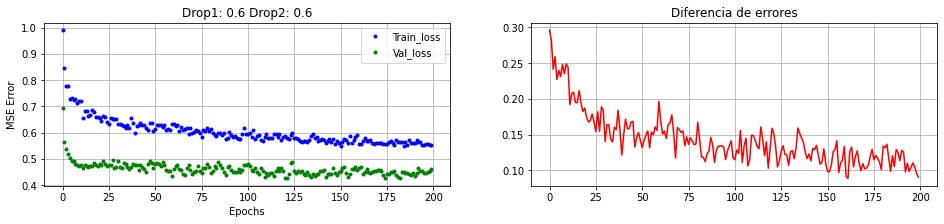

In [ ]:
dropout_1st_layer=[0,0.3,0.6]
dropout_2nd_layer=[0,0.3,0.6]
minval = []
mintrain = []
labels=[]

for drop1 in dropout_1st_layer:
  for drop2 in dropout_2nd_layer:
    # Define architecture
    input_dense= input_layer.Input(shape=(8))
    dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(input_dense)
    dense=layers.Dropout(drop1)(dense)
    dense=layers.Dense(500, activation='relu',use_bias=True, kernel_initializer="glorot_normal")(dense)
    dense=layers.Dropout(drop2)(dense)
    output_dense=layers.Dense(1, activation='relu',use_bias=True, kernel_initializer="uniform")(dense)
    model=models.Model(inputs=input_dense, outputs=output_dense)
    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),loss='mean_squared_error')
    # Train model
    hist = model.fit(x_tr, y_tr, epochs=200, verbose=0, validation_data=(x_val, y_val),callbacks=[History()])
    min=100000
    for index,val in enumerate(hist.history["val_loss"]):
      if val <= min:
        min=val
        ind=index
    minval.append(hist.history["val_loss"][ind])
    mintrain.append(hist.history["loss"][ind])
    labels.append("Drop1: "+str(drop1)+" Drop2: "+str(drop2))
    plt.subplot(1,2,1)
    plt.title("Drop1: "+str(drop1)+" Drop2: "+str(drop2))
    plt.plot(hist.history["loss"],"b.",label="Train_loss")
    plt.plot(hist.history["val_loss"],"g.",label="Val_loss")
    plt.legend(),plt.grid()
    plt.xlabel("Epochs"),plt.ylabel("MSE Error")
    plt.subplot(1,2,2)
    plt.title("Diferencia de errores")
    plt.plot(np.asarray(hist.history["loss"])-np.asarray(hist.history["val_loss"]),"r")
    plt.grid()
    plt.show()

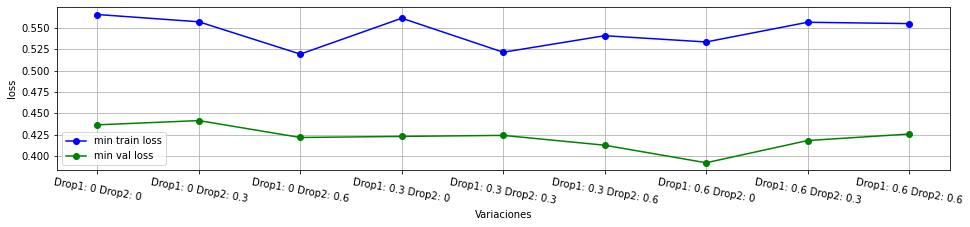

In [ ]:
plt.plot(labels,mintrain,"-o",color="b",label="min train loss")
plt.plot(labels,minval,"-o",color="g",label="min val loss")
plt.xlabel("Variaciones")
plt.ylabel("loss")
plt.xticks(rotation=-10)
plt.grid()
plt.legend()
plt.show()

### Respuesta
En los modelos con dropout, vemos que todos los errores generalmente decrecen, con respecto a los que tienen dorpout 0, asi como tambien vemos un menor sobreajuste en la mayoria de variaciones, dado que el training loss se mantiene mientras que el validation disminuye.


## 1.f Extreme Learning Machines

##### I) Una aproximación para obtener modelos grandes que no sobreajustan es la implementada por ELM. Explique en qué consiste la idea de ELM y por qué esto podría evitar sobreajuste a pesar de utilizar modelos con gran número de parámetros.

Entrene una ELM de una capa fija y una capa oculta, la primera con un número relativamente grande. Puede utilizar los valores propuestos en el código u otros que le parezcan convenientes.

Comente sobre el número total de parámetros y el número de parametros entrenables con respecto a los modelos anteriores. 

**Preguntas:** ¿Cómo se desempeña la red? ¿El número elevado de parámetros totales implica necesariamente _overfitting_?

In [ ]:
from scipy.linalg import pinv2 

neuronas = [1000,5000,10000,50000,100000]

for HIDDEN_UNITS in neuronas:
  INPUT_LENGHT = x_tr.shape[1]


  Win = np.random.uniform(-1,1,size=[INPUT_LENGHT, HIDDEN_UNITS])
  biases = np.random.uniform(-1,1, size = [HIDDEN_UNITS])
  print('Input Weight shape: {shape}'.format(shape=Win.shape))

  def input_to_hidden(x):
    a = np.dot(x, Win)
    a = a + biases
    a = np.maximum(a, 0, a) # ReLU
    return a

  # X = input_to_hidden(x_tr)
  # Xt = np.transpose(X)
  # Wout = np.dot(np.linalg.inv(np.dot(Xt, X)), np.dot(Xt, y_tr))
  # print('Output weights shape: {shape}'.format(shape=Wout.shape))
  Wout = np.dot(pinv2(input_to_hidden(x_tr)), y_tr)

  def predict(x):
    x = input_to_hidden(x)
    y = np.dot(x, Wout)
    return y

  y = predict(x_test)

  error = 0
  total = y.shape[0]
  for i in range(total):
    predicted = y[i]
    test = y_test[i]
    error += (predicted-test)**2
  print("error testing: "+str(error/total))

Input Weight shape: (8, 1000)
error testing: [252.77362694]
Input Weight shape: (8, 5000)
error testing: [51.48503943]
Input Weight shape: (8, 10000)
error testing: [7.97465497]
Input Weight shape: (8, 50000)
error testing: [3.68463286]
Input Weight shape: (8, 100000)
error testing: [3.84490519]


### Respuesta
